# Clustering of customers in "ACMETelephoneABT.csv" dataset

# Problem Statement
A mobile service provider wishes to reduce customer churn. You are asked to use data science skills to help the marketing team devise effective strategies to reduce the churn.

The customer database shared with you includes information about both the customers who have churned and active customers. Devise a way to identify potential customer churn.

# Data Source

ACMETelephoneABT.csv

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import warnings; warnings.simplefilter('ignore')

from sklearn import model_selection
# To calculate accuracy measures and confusion matrix
from sklearn import metrics

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Ensemble method
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('ACMETelephoneABT.csv', na_values=" ")
acme_df = df.copy(deep=True)

In [3]:
df.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,true,6,1,1812,false,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,NaN,NaN,yes,true,9,4,544,true,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,false,7,2,138,true,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,NaN,suburban,no,false,6,3,122,true,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,NaN,town,yes,false,7,8,10,true,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false


In [4]:
df.tail()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
9995,1099911,52,clerical,unknown,yes,false,4,1,892,true,...,1.00,0.635184,-4.321789,1.33,30,0.00,0,0,0,true
9996,1099923,36,NaN,NaN,yes,false,4,8,337,true,...,1.67,0.794198,0.518042,11.33,33,0.00,0,0,2,true
9997,1099939,28,professional,NaN,no,false,2,4,127,true,...,1.00,0.905522,-1.874074,7.67,33,1.00,0,0,0,true
9998,1099965,0,NaN,NaN,unknown,false,7,5,53,true,...,6.33,1.058214,-18.707600,16.00,31,7.33,0,0,0,true
9999,1099988,34,NaN,suburban,yes,false,6,1,773,true,...,0.00,1.197605,13.684288,0.00,25,0.00,0,0,0,true


In [5]:
df.shape

(10000, 33)

In [6]:
df.columns

Index(['customer', ' age', ' occupation', ' regionType', 'marriageStatus',
       ' children', ' income', 'numHandsets', 'handsetAge', 'smartPhone',
       'currentHandsetPrice', ' creditRating', 'homeOwner', ' creditCard',
       'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins',
       'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct',
       'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
       'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
       'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers', 'churn'],
      dtype='object')

In [7]:
# Cleaning column names
df.columns = ['customer_id', 'age', 'occupation', 'regionType', 'marriageStatus',
              'children', 'income', 'numHandsets', 'handsetAge', 'smartPhone',
              'currentHandsetPrice', 'creditRating', 'homeOwner', 'creditCard',
              'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins',
              'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct',
              'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
              'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
              'lastMonthCustomerCareCalls', 'numRetentionCalls',
              'numRetentionOffersAccepted', 'newFrequentNumbers', 'churn']

In [8]:
df.head()

,customer_id,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,true,6,1,1812,false,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,NaN,NaN,yes,true,9,4,544,true,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,false,7,2,138,true,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,NaN,suburban,no,false,6,3,122,true,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,NaN,town,yes,false,7,8,10,true,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false


In [9]:
df.dtypes

customer_id                     int64
age                             int64
occupation                     object
regionType                     object
marriageStatus                 object
children                       object
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                     object
currentHandsetPrice           float64
creditRating                   object
homeOwner                      object
creditCard                     object
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCa

In [10]:
# Here categorical variables are the ones with 'object' datatype

categorical_df = df.select_dtypes(include=['object']).copy()
categorical_df.head()


,occupation,regionType,marriageStatus,children,smartPhone,creditRating,homeOwner,creditCard,churn
0,crafts,town,yes,true,false,C,true,true,false
1,NaN,NaN,yes,true,true,A,false,true,false
2,professional,town,yes,false,true,A,false,true,false
3,NaN,suburban,no,false,true,C,false,true,false
4,NaN,town,yes,false,true,A,false,true,false


In [11]:
categorical_vars = categorical_df.columns.tolist()
categorical_vars

['occupation',
 'regionType',
 'marriageStatus',
 'children',
 'smartPhone',
 'creditRating',
 'homeOwner',
 'creditCard',
 'churn']

In [12]:
# Here numeric variables are the ones with 'int64', 'float64' datatype

numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()
numeric_df.head()

,customer_id,age,income,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
0,1000004,26,6,1,1812,0.00,38.00,7.50,38.00,0.00,...,0.33,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0
1,1000012,36,9,4,544,79.99,35.30,24.25,34.98,0.00,...,4.00,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0
2,1000034,74,7,2,138,29.99,21.15,45.50,16.99,14.00,...,0.00,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3
3,1000063,30,6,3,122,9.99,91.18,332.75,75.00,0.00,...,9.00,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0
4,1000085,32,7,8,10,129.99,93.02,1348.25,75.00,4.75,...,59.33,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0


In [13]:
numeric_vars = numeric_df.columns.tolist()
print('\nnumeric variables:\n\n', numeric_vars)

numeric_vars.pop(0) # pop-out the 'customer_id'
print('\nnumeric variables without customer_id:\n\n', numeric_vars)


numeric variables:

 ['customer_id', 'age', 'income', 'numHandsets', 'handsetAge', 'currentHandsetPrice', 'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls', 'numRetentionOffersAccepted', 'newFrequentNumbers']

numeric variables without customer_id:

 ['age', 'income', 'numHandsets', 'handsetAge', 'currentHandsetPrice', 'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls', 'numRetentionOffersAccepted', 'newFrequentNumbers']


In [14]:
# Check for missing values

print('Number of missing values across columns:')
df.isnull().sum()

Number of missing values across columns:


customer_id                      0
age                              0
occupation                    7400
regionType                    4776
marriageStatus                   0
children                         0
income                           0
numHandsets                      0
handsetAge                       0
smartPhone                       0
currentHandsetPrice              0
creditRating                     0
homeOwner                        0
creditCard                       0
avgBill                          0
avgMins                          0
avgrecurringCharge               0
avgOverBundleMins                0
avgRoamCalls                     0
callMinutesChangePct             0
billAmountChangePct              0
avgReceivedMins                  0
avgOutCalls                      0
avgInCalls                       0
peakOffPeakRatio                 0
peakOffPeakRatioChangePct        0
avgDroppedCalls                  0
lifeTime                         0
lastMonthCustomerCar

# Cleaning categorical variables, Univariate analysis using cross-tab (Count% against each category)

In [15]:
# List of categorical variables

categorical_vars

['occupation',
 'regionType',
 'marriageStatus',
 'children',
 'smartPhone',
 'creditRating',
 'homeOwner',
 'creditCard',
 'churn']

In [16]:


# Cleaning categorical variables, Univariate analysis using cross-tab (Count% against each category)

def cleaning_categorical_variables(var, name, df):
    
    if var=='churn':
        # Target variable
        print('Target variable: churn') 
        print('no. of unique categories in {}:'.format('churn'), df['churn'].nunique())
        print('\nBefore treatment:\n', df['churn'].unique())  
        
        var = df['churn']
        df['churn'] = var.replace(to_replace={' false':'not-churned', ' true':'churned'})
        
        print('\nAfter treatment:\n', df['churn'].unique()) 
        print('\ndtype: {}\n'.format(df['churn'].dtype))
        print(df['churn'].head(10))
     
    elif name == 'occupation':
        
        print('\n\n')
        print('Independent variable:', name, '\n')     
        print('no. of unique categories in {}:'.format(name), df[name].nunique())
        print('\nBefore treatment:\n', df[name].unique())   
       
        var = df[name]
        df[name] = var.replace(to_replace={' crafts':'crafts', np.nan:'missing', ' professional':'professional', 
                                           ' homemaker':'homemaker', ' clerical':'clerical', 
                                           ' self-employed':'self_employed', ' retired':'retired',' student':'student'})
        
        print('\nAfter treatment:\n', df[name].unique()) 
        print('\ndtype: {}\n'.format(df[name].dtype))
        print(df[name].head(10), '\n\n')
        
        print("Crosstab 'churn' vs 'occupation' count% against each category\n")
        print(pd.crosstab(df['churn'], df['occupation'], rownames=['churn'], colnames=['occupation']).apply(lambda col: round((col/col.sum())*100, 2), axis=0))
        
    elif name == 'regionType':
        
        print('\n\n')
        print('Independent variable:', name, '\n')    
        print('no. of unique categories in {}:'.format(name), df[name].nunique())
        print('\nBefore treatment:\n', df[name].unique())   
        
        var = df[name]
        df[name] = var.replace(to_replace={' town':'town', np.nan:'missing', ' suburban':'suburban', ' rural':'rural', 
                                           ' s':'suburban', ' unknown':'missing', ' t':'town', ' r':'rural'})
        print('\nAfter treatment:\n', df[name].unique()) 
        print('\ndtype: {}\n'.format(df[name].dtype))
        print(df[name].head(10), '\n\n')
        
        print("Crosstab 'churn' vs 'regionType' count% against each category\n")
        print(pd.crosstab(df['churn'], df['regionType'], rownames=['churn'], colnames=['regionType']).apply(lambda col: round((col/col.sum())*100, 2), axis=0))
        
    elif name == 'marriageStatus':
        
        print('\n\n')
        print('Independent variable:', name, '\n')     
        print('no. of unique categories in {}:'.format(name), df[name].nunique())
        print('\nBefore treatment:\n', df[name].unique())   
        
        var = df[name]
        df[name] = var.replace(to_replace={' yes':'yes', ' no':'no', ' unknown':'missing'})
        
        print('\nAfter treatment:\n', df[name].unique()) 
        print('\ndtype: {}\n'.format(df[name].dtype))
        print(df[name].head(10), '\n\n')
        
        print("Crosstab 'churn' vs 'marriageStatus' count% against each category\n")
        print(pd.crosstab(df['churn'], df['marriageStatus'], rownames=['churn'], colnames=['marriageStatus']).apply(lambda col: round((col/col.sum())*100, 2), axis=0))
        
    elif name == 'children':
        
        print('\n\n')
        print('Independent variable:', name, '\n')     
        print('no. of unique categories in {}:'.format(name), df[name].nunique())
        print('\nBefore treatment:\n', df[name].unique())   
        
        var = df[name]
        df[name] = var.replace(to_replace={' true':'yes', ' false':'no'})
        
        print('\nAfter treatment:\n', df[name].unique()) 
        print('\ndtype: {}\n'.format(df[name].dtype))
        print(df[name].head(10), '\n\n')
        
        print("Crosstab 'churn' vs 'children' count% against each category\n")
        print(pd.crosstab(df['churn'], df['children'], rownames=['churn'], colnames=['children']).apply(lambda col: round((col/col.sum())*100, 2), axis=0))
        
    elif name == 'smartPhone':
        
        print('\n\n')
        print('Independent variable:', name, '\n')      
        print('no. of unique categories in {}:'.format(name), df[name].nunique())
        print('\nBefore treatment:\n', df[name].unique())   
        
        var = df[name]
        df[name] = var.replace(to_replace={' false':'no', ' true':'yes'})
            
        print('\nAfter treatment:\n', df[name].unique()) 
        print('\ndtype: {}\n'.format(df[name].dtype))
        print(df[name].head(10), '\n\n')
        
        print("Crosstab 'churn' vs 'smartPhone' count% against each category\n")
        print(pd.crosstab(df['churn'], df['smartPhone'], rownames=['churn'], colnames=['smartPhone']).apply(lambda col: round((col/col.sum())*100, 2), axis=0))
        
    elif name =='creditRating':
        
        print('\n\n')
        print('Independent variable:', name, '\n')      
        print('no. of unique categories in {}:'.format(name), df[name].nunique())
        print('\nBefore treatment:\n', df[name].unique())   
        
        var = df[name]
        df[name] = var.replace(to_replace={' C':'C', ' A':'A', ' D':'D', ' E':'E', ' G':'G', ' B':'B', ' F':'F'})
        
        print('\nAfter treatment:\n', df[name].unique()) 
        print('\ndtype: {}\n'.format(df[name].dtype))
        print(df[name].head(10), '\n\n')
        
        print("Crosstab 'churn' vs 'creditRating' count% against each category\n")
        print(pd.crosstab(df['churn'], df['creditRating'], rownames=['churn'], colnames=['creditRating']).apply(lambda col: round((col/col.sum())*100, 2), axis=0))
        
    elif name == 'homeOwner':
        
        print('\n\n')
        print('Independent variable:', name, '\n')      
        print('no. of unique categories in {}:'.format(name), df[name].nunique())
        print('\nBefore treatment:\n', df[name].unique())   
        
        var = df[name]
        df[name] = var.replace(to_replace={' true':'yes', ' false':'no'})
        
        print('\nAfter treatment:\n', df[name].unique()) 
        print('\ndtype: {}\n'.format(df[name].dtype))
        print(df[name].head(10), '\n\n')
        
        print("Crosstab 'churn' vs 'homeOwner' count% against each category\n")
        print(pd.crosstab(df['churn'], df['homeOwner'], rownames=['churn'], colnames=['homeOwner']).apply(lambda col: round((col/col.sum())*100, 2), axis=0))
        
    elif name == 'creditCard':
        
        print('\n\n')
        print('Independent variable:', name, '\n')     
        print('no. of unique categories in {}:'.format(name), df[name].nunique())
        print('\nBefore treatment:\n', df[name].unique())   

        var = df[name]
        df[name] = var.replace(to_replace={' true':'yes', ' false':'no', ' no':'no', ' t':'yes', ' f':'no', ' yes':'yes'})
        
        print('\nAfter treatment:\n', df[name].unique()) 
        print('\ndtype: {}\n'.format(df[name].dtype))
        print(df[name].head(10), '\n\n')
        
        print("Crosstab 'churn' vs 'creditCard' count% against each category\n")
        print(pd.crosstab(df['churn'], df['creditCard'], rownames=['churn'], colnames=['creditCard']).apply(lambda col: round((col/col.sum())*100, 2), axis=0))
        
    else:
        print('end of categorical variables treatment')
    
    return df


var = 'churn' 
name =''
temp = pd.DataFrame()
temp = cleaning_categorical_variables(var, name, df)
df = temp


for name in categorical_vars:
    temp = pd.DataFrame()
    var = ''
    if name != 'churn':
        temp = cleaning_categorical_variables(var, name, df)
        df = temp

Target variable: churn
no. of unique categories in churn: 2

Before treatment:
 [' false' ' true']

After treatment:
 ['not-churned' 'churned']

dtype: object

0    not-churned
1    not-churned
2    not-churned
3    not-churned
4    not-churned
5    not-churned
6    not-churned
7    not-churned
8    not-churned
9    not-churned
Name: churn, dtype: object



Independent variable: occupation 

no. of unique categories in occupation: 7

Before treatment:
 [' crafts' nan ' professional' ' homemaker' ' clerical' ' self-employed'
 ' retired' ' student']

After treatment:
 ['crafts' 'missing' 'professional' 'homemaker' 'clerical' 'self_employed'
 'retired' 'student']

dtype: object

0          crafts
1         missing
2    professional
3         missing
4         missing
5       homemaker
6         missing
7        clerical
8         missing
9         missing
Name: occupation, dtype: object 


Crosstab 'churn' vs 'occupation' count% against each category

occupation   clerical  crafts  homema

In [17]:
# Check for missing values

print('Number of missing values across columns:')
df.isnull().sum()

Number of missing values across columns:


customer_id                   0
age                           0
occupation                    0
regionType                    0
marriageStatus                0
children                      0
income                        0
numHandsets                   0
handsetAge                    0
smartPhone                    0
currentHandsetPrice           0
creditRating                  0
homeOwner                     0
creditCard                    0
avgBill                       0
avgMins                       0
avgrecurringCharge            0
avgOverBundleMins             0
avgRoamCalls                  0
callMinutesChangePct          0
billAmountChangePct           0
avgReceivedMins               0
avgOutCalls                   0
avgInCalls                    0
peakOffPeakRatio              0
peakOffPeakRatioChangePct     0
avgDroppedCalls               0
lifeTime                      0
lastMonthCustomerCareCalls    0
numRetentionCalls             0
numRetentionOffersAccepted    0
newFrequ

# Cleaning numeric variables, Univariate analysis using box plot

In [18]:
# Summary statistics of numeric data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.049974e+06,28798.410950,1.000001e+06,1.025200e+06,1.049833e+06,1.074990e+06,1.099988e+06
age,10000.0,3.031840e+01,22.158676,0.000000e+00,0.000000e+00,3.400000e+01,4.800000e+01,9.800000e+01
income,10000.0,4.293600e+00,3.139902,0.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00
numHandsets,10000.0,1.804500e+00,1.345088,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.100000e+01
handsetAge,10000.0,3.901717e+02,257.076656,-5.000000e+00,2.100000e+02,3.390000e+02,5.250000e+02,1.812000e+03
currentHandsetPrice,10000.0,3.573070e+01,57.072922,0.000000e+00,0.000000e+00,0.000000e+00,5.999000e+01,4.999900e+02
avgBill,10000.0,5.892760e+01,43.889815,0.000000e+00,3.332750e+01,4.920500e+01,7.176250e+01,5.842300e+02
avgMins,10000.0,5.211706e+02,540.435285,0.000000e+00,1.506275e+02,3.596250e+02,7.091875e+02,6.336250e+03
avgrecurringCharge,10000.0,4.623654e+01,23.964960,0.000000e+00,3.000000e+01,4.499000e+01,5.999000e+01,3.379800e+02
avgOverBundleMins,10000.0,4.239267e+01,106.374374,0.000000e+00,0.000000e+00,3.000000e+00,4.375000e+01,4.320750e+03


In [19]:
numeric_vars

['age',
 'income',
 'numHandsets',
 'handsetAge',
 'currentHandsetPrice',
 'avgBill',
 'avgMins',
 'avgrecurringCharge',
 'avgOverBundleMins',
 'avgRoamCalls',
 'callMinutesChangePct',
 'billAmountChangePct',
 'avgReceivedMins',
 'avgOutCalls',
 'avgInCalls',
 'peakOffPeakRatio',
 'peakOffPeakRatioChangePct',
 'avgDroppedCalls',
 'lifeTime',
 'lastMonthCustomerCareCalls',
 'numRetentionCalls',
 'numRetentionOffersAccepted',
 'newFrequentNumbers']

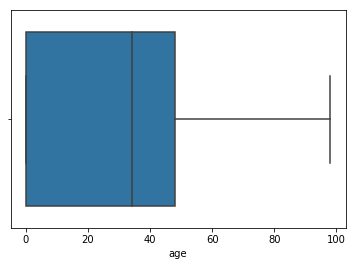

In [20]:
sns.boxplot(x='age', data=df)

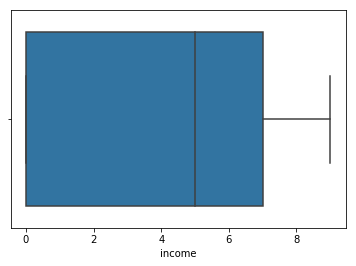

In [21]:
sns.boxplot(x='income', data=df)

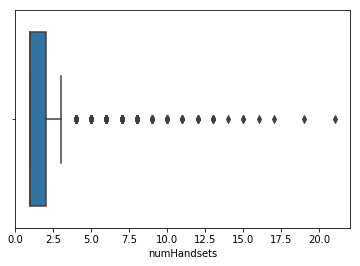

In [22]:
sns.boxplot(x='numHandsets', data=df)

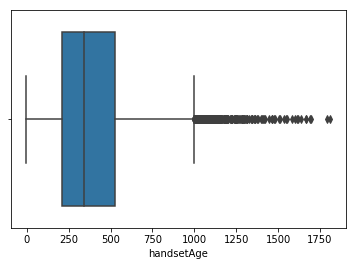

In [23]:
sns.boxplot(x='handsetAge', data=df)

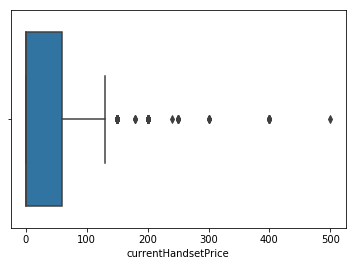

In [24]:
sns.boxplot(x='currentHandsetPrice', data=df)

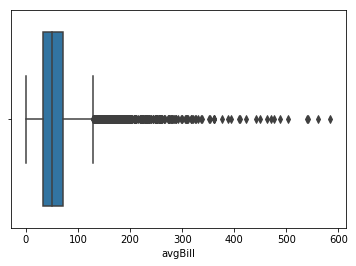

In [25]:
sns.boxplot(x='avgBill', data=df)

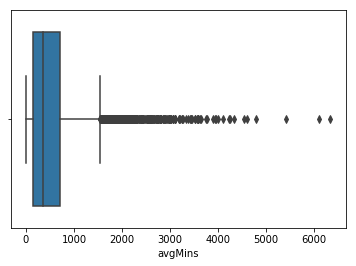

In [26]:
sns.boxplot(x='avgMins', data=df)

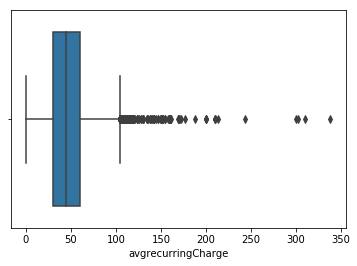

In [27]:
sns.boxplot(x='avgrecurringCharge', data=df)

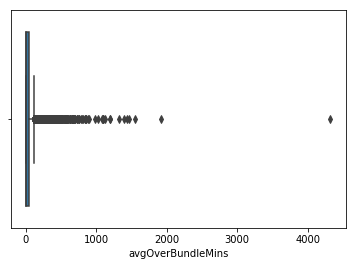

In [28]:
sns.boxplot(x='avgOverBundleMins', data=df)

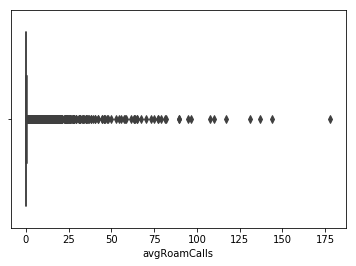

In [29]:
sns.boxplot(x='avgRoamCalls', data=df)

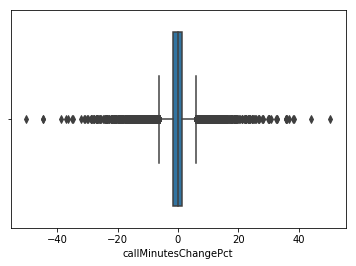

In [30]:
sns.boxplot(x='callMinutesChangePct', data=df)

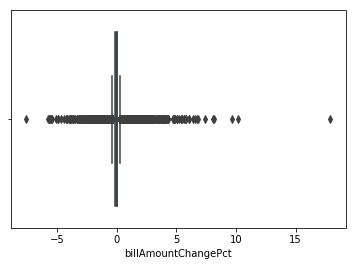

In [31]:
sns.boxplot(x='billAmountChangePct', data=df)

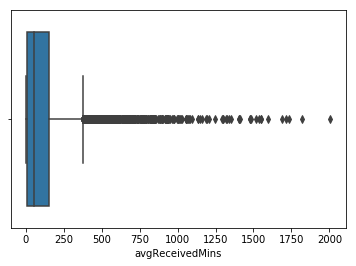

In [32]:
sns.boxplot(x='avgReceivedMins', data=df)

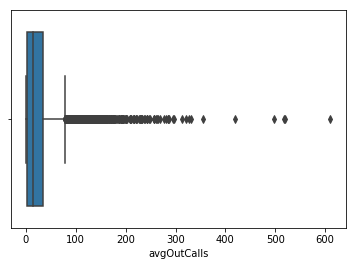

In [33]:
sns.boxplot(x='avgOutCalls', data=df)

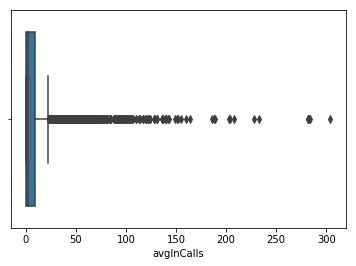

In [34]:
sns.boxplot(x='avgInCalls', data=df)

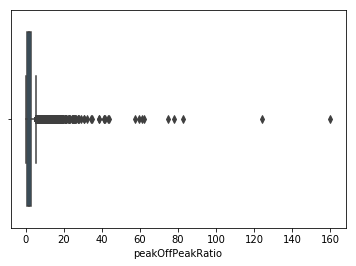

In [35]:
sns.boxplot(x='peakOffPeakRatio', data=df)

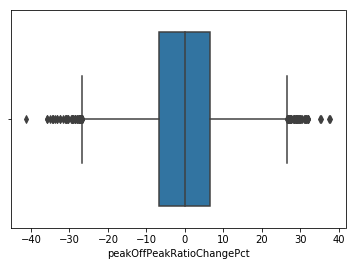

In [36]:
sns.boxplot(x='peakOffPeakRatioChangePct', data=df)

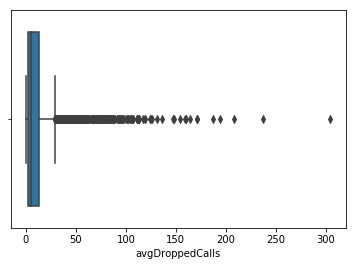

In [37]:
sns.boxplot(x='avgDroppedCalls', data=df)

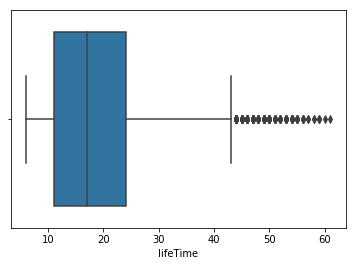

In [38]:
sns.boxplot(x='lifeTime', data=df)

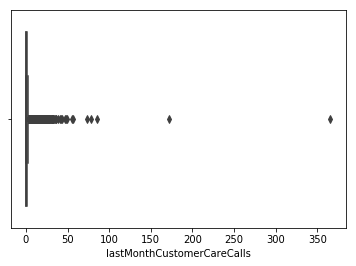

In [39]:
sns.boxplot(x='lastMonthCustomerCareCalls', data=df)

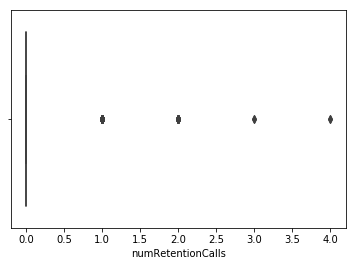

In [40]:
sns.boxplot(x='numRetentionCalls', data=df)

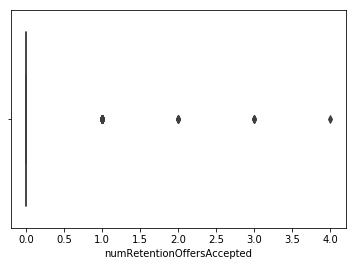

In [41]:
sns.boxplot(x='numRetentionOffersAccepted', data=df)

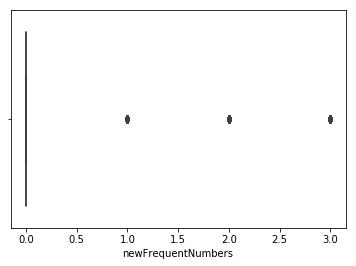

In [42]:
sns.boxplot(x='newFrequentNumbers', data=df)

In [43]:
# Variable 'handsetAge' has negative values and need to be treated

new_array = np.array(df['handsetAge'])
new_array[new_array < 0] = 0
df['new_handsetAge'] = pd.DataFrame(new_array) 


In [44]:
# Outliers treatment in all numeric variables

def outliers_treatment(name, df):
    print('\nIndependent variable:', name)
    print('Possible LOWER and UPPER boudaries for "{}" variable below or above which are floored and ceiled to these boundaries'.format(name))
    q75, q25 = np.percentile(df[name], [75, 25])
    iqr = q75 - q25
    min_val = q25 - 1.5*iqr
    max_val = q75 + 1.5*iqr
  
    
    if (name == 'callMinutesChangePct' or name == 'billAmountChangePct' or name == 'peakOffPeakRatioChangePct'):
        if min_val<0:
            pass
    else:
        if min_val<0:
            min_val=0        
            
    print('min_val =', min_val)
    print('max_val =', max_val, '\n')       
    
    new_array = np.array(df[name])    
    new_array[new_array > max_val] = max_val
    new_array[new_array < min_val] = min_val
    new_name = 'new_' + name
    df[new_name] = pd.DataFrame(new_array)       
   
    return df 

# Variables which can take negative values
neg_vars = ['callMinutesChangePct', 'billAmountChangePct', 'peakOffPeakRatioChangePct']
    
name = ''   
for name in numeric_vars:   
    temp = pd.DataFrame()   
    temp = outliers_treatment(name, df)
    df = temp


Independent variable: age
Possible LOWER and UPPER boudaries for "age" variable below or above which are floored and ceiled to these boundaries
min_val = 0
max_val = 120.0 


Independent variable: income
Possible LOWER and UPPER boudaries for "income" variable below or above which are floored and ceiled to these boundaries
min_val = 0
max_val = 17.5 


Independent variable: numHandsets
Possible LOWER and UPPER boudaries for "numHandsets" variable below or above which are floored and ceiled to these boundaries
min_val = 0
max_val = 3.5 


Independent variable: handsetAge
Possible LOWER and UPPER boudaries for "handsetAge" variable below or above which are floored and ceiled to these boundaries
min_val = 0
max_val = 997.5 


Independent variable: currentHandsetPrice
Possible LOWER and UPPER boudaries for "currentHandsetPrice" variable below or above which are floored and ceiled to these boundaries
min_val = 0
max_val = 149.975 


Independent variable: avgBill
Possible LOWER and UPPER bo

# After outlier-treatment in numeric variables, convert 0 values of required variables to np.nan, later these np.nan values can be predicted and imputed using model

In [45]:
replace_zero_with_nan = ['new_age', 'new_numHandsets', 'new_currentHandsetPrice']

name = ''

for name in replace_zero_with_nan:
    
    var = df[name]
    # Replace 0 with np.nan
    df[name] = var.replace(to_replace={0:np.nan})
    
df[['new_age', 'new_numHandsets', 'new_currentHandsetPrice']].tail(10)

,new_age,new_numHandsets,new_currentHandsetPrice
9990,NaN,1,NaN
9991,46.0,2,29.99
9992,42.0,1,NaN
9993,54.0,3,79.99
9994,44.0,2,29.99
9995,52.0,1,NaN
9996,36.0,3,59.99
9997,28.0,3,29.99
9998,NaN,3,59.99
9999,34.0,1,NaN


In [46]:
""" 'df' contains all the original categorical variables(cleaned), original numeric variables(uncleaned), 

new numeric variables(outliers-treated)""" 

cleaned_df = df.copy(deep=True)

df.tail(10)

,customer_id,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,new_avgOutCalls,new_avgInCalls,new_peakOffPeakRatio,new_peakOffPeakRatioChangePct,new_avgDroppedCalls,new_lifeTime,new_lastMonthCustomerCareCalls,new_numRetentionCalls,new_numRetentionOffersAccepted,new_newFrequentNumbers
9990,1099815,0,missing,suburban,missing,no,0,1,799,yes,...,1.67,0.00,5.066546,17.686533,1.33,26,0.000,0,0,0
9991,1099840,46,missing,missing,yes,yes,2,2,382,yes,...,28.67,6.33,1.306962,-9.371738,3.67,33,0.330,0,0,0
9992,1099855,42,retired,suburban,yes,yes,7,1,792,no,...,10.67,8.67,1.999639,-0.481874,2.00,29,0.000,0,0,0
9993,1099863,54,professional,suburban,yes,no,9,3,128,yes,...,0.00,0.33,5.066546,6.240780,2.00,33,0.000,0,0,0
9994,1099877,44,professional,suburban,yes,yes,6,2,351,yes,...,13.67,0.67,1.186763,9.011648,14.00,33,2.330,0,0,0
9995,1099911,52,clerical,missing,yes,no,4,1,892,yes,...,4.00,1.00,0.635184,-4.321789,1.33,30,0.000,0,0,0
9996,1099923,36,missing,missing,yes,no,4,8,337,yes,...,3.67,1.67,0.794198,0.518042,11.33,33,0.000,0,0,0
9997,1099939,28,professional,missing,no,no,2,4,127,yes,...,23.33,1.00,0.905522,-1.874074,7.67,33,1.000,0,0,0
9998,1099965,0,missing,missing,missing,no,7,5,53,yes,...,9.67,6.33,1.058214,-18.707600,16.00,31,3.325,0,0,0
9999,1099988,34,missing,suburban,yes,no,6,1,773,yes,...,0.00,0.00,1.197605,13.684288,0.00,25,0.000,0,0,0


# Encoding categorical variables using 'LabelEncoder'

In [47]:
# Build a new dataframe containing only the 'object' columns from the cleaned 'df'

category_df_clnd = pd.DataFrame()
df_full = pd.DataFrame()
le_category_df = pd.DataFrame()

category_df_clnd = df.select_dtypes(include=['object']).copy()
category_df_clnd.head()



,occupation,regionType,marriageStatus,children,smartPhone,creditRating,homeOwner,creditCard,churn
0,crafts,town,yes,yes,no,C,yes,yes,not-churned
1,missing,missing,yes,yes,yes,A,no,yes,not-churned
2,professional,town,yes,no,yes,A,no,yes,not-churned
3,missing,suburban,no,no,yes,C,no,yes,not-churned
4,missing,town,yes,no,yes,A,no,yes,not-churned


In [48]:
category_df_clnd.tail()

,occupation,regionType,marriageStatus,children,smartPhone,creditRating,homeOwner,creditCard,churn
9995,clerical,missing,yes,no,yes,C,yes,yes,churned
9996,missing,missing,yes,no,yes,C,no,no,churned
9997,professional,missing,no,no,yes,B,no,yes,churned
9998,missing,missing,missing,no,yes,E,no,yes,churned
9999,missing,suburban,yes,no,yes,A,no,yes,churned


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
name = ''
for name in categorical_vars:
    new_name = 'le_' + name
    le_category_df[new_name] = le.fit_transform(category_df_clnd[name])
    
le_category_df.head()    

,le_occupation,le_regionType,le_marriageStatus,le_children,le_smartPhone,le_creditRating,le_homeOwner,le_creditCard,le_churn
0,1,3,2,1,0,2,1,1,1
1,3,0,2,1,1,0,0,1,1
2,4,3,2,0,1,0,0,1,1
3,3,2,1,0,1,2,0,1,1
4,3,3,2,0,1,0,0,1,1


In [50]:
le_category_df.tail()

,le_occupation,le_regionType,le_marriageStatus,le_children,le_smartPhone,le_creditRating,le_homeOwner,le_creditCard,le_churn
9995,0,0,2,0,1,2,1,1,0
9996,3,0,2,0,1,2,0,0,0
9997,4,0,1,0,1,1,0,1,0
9998,3,0,0,0,1,4,0,1,0
9999,3,2,2,0,1,0,0,1,0


In [51]:
# Concatenate the original 'df' and 'le_category_df' and create 'df_full'

df_full = pd.concat([df, le_category_df], axis=1)

df_full.head()

,customer_id,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,new_newFrequentNumbers,le_occupation,le_regionType,le_marriageStatus,le_children,le_smartPhone,le_creditRating,le_homeOwner,le_creditCard,le_churn
0,1000004,26,crafts,town,yes,yes,6,1,1812,no,...,0,1,3,2,1,0,2,1,1,1
1,1000012,36,missing,missing,yes,yes,9,4,544,yes,...,0,3,0,2,1,1,0,0,1,1
2,1000034,74,professional,town,yes,no,7,2,138,yes,...,0,4,3,2,0,1,0,0,1,1
3,1000063,30,missing,suburban,no,no,6,3,122,yes,...,0,3,2,1,0,1,2,0,1,1
4,1000085,32,missing,town,yes,no,7,8,10,yes,...,0,3,3,2,0,1,0,0,1,1


### Observation:
'df_full' contains all variables: cleaned-up columns from the categorical variables as well as label-encoded categorical varibales

**In 'le_churn' column:**

1 = customer 'not-churned'

0 = customer 'churned'

In [52]:
df_full_copy = df_full.copy(deep=True)
df_full = df_full_copy
df_full.head()

,customer_id,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,new_newFrequentNumbers,le_occupation,le_regionType,le_marriageStatus,le_children,le_smartPhone,le_creditRating,le_homeOwner,le_creditCard,le_churn
0,1000004,26,crafts,town,yes,yes,6,1,1812,no,...,0,1,3,2,1,0,2,1,1,1
1,1000012,36,missing,missing,yes,yes,9,4,544,yes,...,0,3,0,2,1,1,0,0,1,1
2,1000034,74,professional,town,yes,no,7,2,138,yes,...,0,4,3,2,0,1,0,0,1,1
3,1000063,30,missing,suburban,no,no,6,3,122,yes,...,0,3,2,1,0,1,2,0,1,1
4,1000085,32,missing,town,yes,no,7,8,10,yes,...,0,3,3,2,0,1,0,0,1,1


# After label-encoding of the categorical variables, convert 'missing' category in label-encoded variables to np.nan, later these np.nan values can be predicted and imputed using model

In [53]:
categorical_vars

['occupation',
 'regionType',
 'marriageStatus',
 'children',
 'smartPhone',
 'creditRating',
 'homeOwner',
 'creditCard',
 'churn']

### Converting back 'missing' in 'le_occupation' variable to np.nan

In [54]:
df_full['occupation'].unique()

array(['crafts', 'missing', 'professional', 'homemaker', 'clerical',
       'self_employed', 'retired', 'student'], dtype=object)

In [55]:
df_full['le_occupation'].unique()

array([1, 3, 4, 2, 0, 6, 5, 7])

In [56]:
df_full[['occupation', 'le_occupation']].head()

,occupation,le_occupation
0,crafts,1
1,missing,3
2,professional,4
3,missing,3
4,missing,3


In [57]:
var = df_full['le_occupation']

df_full['le_occupation'] = var.replace(to_replace={3:np.nan})

In [58]:
df_full[['occupation', 'le_occupation']].head()

,occupation,le_occupation
0,crafts,1.0
1,missing,NaN
2,professional,4.0
3,missing,NaN
4,missing,NaN


### Converting back 'missing' in 'regionType' variable to np.nan

In [59]:
df_full['regionType'].unique()

array(['town', 'missing', 'suburban', 'rural'], dtype=object)

In [60]:
df_full['le_regionType'].unique()

array([3, 0, 2, 1])

In [61]:
df_full[['regionType', 'le_regionType']].head()

,regionType,le_regionType
0,town,3
1,missing,0
2,town,3
3,suburban,2
4,town,3


In [62]:
var = df_full['le_regionType']

df_full['le_regionType'] = var.replace(to_replace={0:np.nan})

In [63]:
df_full[['regionType', 'le_regionType']].head()

,regionType,le_regionType
0,town,3.0
1,missing,NaN
2,town,3.0
3,suburban,2.0
4,town,3.0


### Converting back 'missing' in 'marriageStatus' variable to np.nan

In [64]:
df_full['marriageStatus'].unique()

array(['yes', 'no', 'missing'], dtype=object)

In [65]:
df_full['le_marriageStatus'].unique()

array([2, 1, 0])

In [66]:
df_full[['marriageStatus', 'le_marriageStatus']].tail()

,marriageStatus,le_marriageStatus
9995,yes,2
9996,yes,2
9997,no,1
9998,missing,0
9999,yes,2


In [67]:
var = df_full['le_marriageStatus']

df_full['le_marriageStatus'] = var.replace(to_replace={0:np.nan})

In [68]:
df_full[['marriageStatus', 'le_marriageStatus']].tail()

,marriageStatus,le_marriageStatus
9995,yes,2.0
9996,yes,2.0
9997,no,1.0
9998,missing,NaN
9999,yes,2.0


### Converting back 'missing' in 'children' variable to np.nan

In [69]:
df_full['children'].unique()

array(['yes', 'no'], dtype=object)

In [70]:
df_full['le_children'].unique()

array([1, 0])

#### No missing values in 'children'

### Converting back 'missing' in 'smartPhone' variable to np.nan

In [71]:
df_full['smartPhone'].unique()

array(['no', 'yes'], dtype=object)

In [72]:
df_full['le_smartPhone'].unique()

array([0, 1])

#### No missing values in 'smartPhone'

### Converting back 'missing' in 'creditRating' variable to np.nan

In [73]:
df_full['creditRating'].unique()

array(['C', 'A', 'D', 'E', 'G', 'B', 'F'], dtype=object)

In [74]:
df_full['le_creditRating'].unique()

array([2, 0, 3, 4, 6, 1, 5])

#### No missing values in 'creditRating'

### Converting back 'missing' in 'churn' variable to np.nan

In [75]:
df_full['churn'].unique()

array(['not-churned', 'churned'], dtype=object)

In [76]:
df_full['le_churn'].unique()

array([1, 0])

#### No missing values in 'churn'

# Model-based approach in predicting and imputing the missing values (np.nan) in both numeric and categorical variables

In [77]:
df_model = df_full[['new_age', 'le_occupation', 'le_regionType', 'le_marriageStatus', 'le_children', 'new_income', 
                   'new_numHandsets', 'new_handsetAge', 'le_smartPhone', 'new_currentHandsetPrice', 'le_creditRating', 
                   'le_homeOwner', 'le_creditCard', 'new_avgBill', 'new_avgMins', 'new_avgrecurringCharge', 
                   'new_avgOverBundleMins', 'new_avgRoamCalls', 'new_callMinutesChangePct', 'new_billAmountChangePct',
                   'new_avgReceivedMins', 'new_avgOutCalls', 'new_avgInCalls', 'new_peakOffPeakRatio', 
                   'new_peakOffPeakRatioChangePct', 'new_avgDroppedCalls', 'new_lifeTime', 'new_lastMonthCustomerCareCalls', 
                   'new_numRetentionCalls', 'new_numRetentionOffersAccepted', 'new_newFrequentNumbers', 'le_churn']]

print('Shape:', df_model.shape)

df_model.head()                  

Shape: (10000, 32)


,new_age,le_occupation,le_regionType,le_marriageStatus,le_children,new_income,new_numHandsets,new_handsetAge,le_smartPhone,new_currentHandsetPrice,...,new_avgInCalls,new_peakOffPeakRatio,new_peakOffPeakRatioChangePct,new_avgDroppedCalls,new_lifeTime,new_lastMonthCustomerCareCalls,new_numRetentionCalls,new_numRetentionOffersAccepted,new_newFrequentNumbers,le_churn
0,26.0,1.0,3.0,2.0,1,6,1,997,0,NaN,...,0.00,0.362398,-6.330770,0.00,43,0.00,0,0,0,1
1,36.0,NaN,NaN,2.0,1,9,3,544,1,79.99,...,1.67,5.066546,7.499560,0.00,43,0.00,0,0,0,1
2,74.0,4.0,3.0,2.0,0,7,2,138,1,29.99,...,0.33,0.500000,-5.940493,4.33,43,0.00,0,0,0,1
3,30.0,NaN,2.0,1.0,0,6,3,122,1,9.99,...,4.67,5.066546,-0.066485,5.33,43,0.33,0,0,0,1
4,32.0,NaN,3.0,2.0,0,7,3,10,1,129.99,...,22.50,5.066546,-7.208502,14.67,43,0.00,0,0,0,1


# Standardise data

In [78]:
X = df_model.drop(['le_churn'], axis=1)
y = df_model[['le_churn']]

X_std = X.apply(lambda x: (x-np.mean(x))/(np.std(x)))

print('Shape:', X_std.shape)

X_std.head()

Shape: (10000, 31)


,new_age,le_occupation,le_regionType,le_marriageStatus,le_children,new_income,new_numHandsets,new_handsetAge,le_smartPhone,new_currentHandsetPrice,...,new_avgOutCalls,new_avgInCalls,new_peakOffPeakRatio,new_peakOffPeakRatioChangePct,new_avgDroppedCalls,new_lifeTime,new_lastMonthCustomerCareCalls,new_numRetentionCalls,new_numRetentionOffersAccepted,new_newFrequentNumbers
0,-1.371986,-1.589612,1.357920,0.831690,1.759739,0.543484,-0.793582,2.515959,-3.025274,NaN,...,-0.915025,-0.759035,-1.009874,-0.636249,-0.971691,2.636011,-0.680706,NaN,NaN,NaN
1,-0.562845,NaN,NaN,0.831690,1.759739,1.498975,1.765947,0.651806,0.330549,0.017347,...,-0.760936,-0.541087,2.258645,0.763884,-0.971691,2.636011,-0.680706,NaN,NaN,NaN
2,2.511890,0.226023,1.357920,0.831690,-0.568266,0.861981,0.486183,-1.018936,0.330549,-0.935986,...,-0.928880,-0.715967,-0.914266,-0.596739,-0.476485,2.636011,-0.680706,NaN,NaN,NaN
3,-1.048329,NaN,-0.329959,-1.202371,-0.568266,0.543484,1.765947,-1.084778,0.330549,-1.317319,...,-0.551006,-0.149563,2.258645,-0.002075,-0.362119,2.636011,-0.418945,NaN,NaN,NaN
4,-0.886501,NaN,1.357920,0.831690,-0.568266,0.861981,1.765947,-1.545672,0.330549,0.970681,...,1.562150,2.177390,2.258645,-0.725108,0.706063,2.636011,-0.680706,NaN,NaN,NaN


# Model based missing values imputation

In [79]:
import sys

In [80]:
sys.path.append('/mnt/home/roopa.sondur_outlook/custom-packages/python3')

In [81]:
import fancyimpute

Using TensorFlow backend.


In [82]:
from fancyimpute import KNN, SoftImpute

In [83]:
# Convert standardised 'X_std' dataframe to 'X_mat' matrix

X_mat = X_std.as_matrix()
print(X.shape)
print(X_mat.shape)
X_mat

(10000, 31)
(10000, 31)


array([[-1.37198552, -1.58961209,  1.35791954, ...,         nan,
                nan,         nan],
       [-0.56284469,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 2.51189047,  0.22602333,  1.35791954, ...,         nan,
                nan,         nan],
       ..., 
       [-1.21015736,  0.22602333,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.72467286,         nan, -0.32995869, ...,         nan,
                nan,         nan]])

In [84]:
# X_mat is a data matrix which we're going to randomly drop entries from

missing_mask = np.random.rand(*X_mat.shape) < 0.5

X_incomplete = X_mat.copy()

# missing entries indicated with NaN
X_incomplete[missing_mask] = np.nan

In [85]:
X_incomplete

array([[        nan,         nan,  1.35791954, ...,         nan,
                nan,         nan],
       [-0.56284469,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 2.51189047,  0.22602333,  1.35791954, ...,         nan,
                nan,         nan],
       ..., 
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

# KNN based missing values imputation

In [86]:
# Using 3 nearest rows which have a feature to fill in each row's missing features
knnImpute = KNN(k=3)
X_filled_knn = knnImpute.complete(X_incomplete)

Imputing row 1/10000 with 18 missing, elapsed time: 38.016
Imputing row 101/10000 with 18 missing, elapsed time: 38.161
Imputing row 201/10000 with 19 missing, elapsed time: 38.319
Imputing row 301/10000 with 15 missing, elapsed time: 38.472
Imputing row 401/10000 with 21 missing, elapsed time: 38.638
Imputing row 501/10000 with 22 missing, elapsed time: 38.786
Imputing row 601/10000 with 18 missing, elapsed time: 38.934
Imputing row 701/10000 with 21 missing, elapsed time: 39.083
Imputing row 801/10000 with 16 missing, elapsed time: 39.232
Imputing row 901/10000 with 17 missing, elapsed time: 39.386
Imputing row 1001/10000 with 20 missing, elapsed time: 39.535
Imputing row 1101/10000 with 19 missing, elapsed time: 39.684
Imputing row 1201/10000 with 17 missing, elapsed time: 39.832
Imputing row 1301/10000 with 17 missing, elapsed time: 39.983
Imputing row 1401/10000 with 21 missing, elapsed time: 40.134
Imputing row 1501/10000 with 18 missing, elapsed time: 40.284
Imputing row 1601/10

In [87]:
X_filled_knn

array([[-0.02341747, -0.55684947,  1.35791954, ...,  0.        ,
         0.        ,  0.        ],
       [-0.56284469, -0.58092574, -0.89258476, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.51189047,  0.22602333,  1.35791954, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-0.29313108,  0.22602333, -0.32995869, ...,  0.        ,
         0.        ,  0.        ],
       [-0.61678741,  0.22516334, -0.32995869, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13130291,  0.62949787, -0.32995869, ...,  0.        ,
         0.        ,  0.        ]])

In [88]:
# knn_mskd = predicted values of masked items using KNN
knn_mskd = X_filled_knn[missing_mask]
print(type(knn_mskd))
print(knn_mskd.dtype)
print(knn_mskd.ndim)

<class 'numpy.ndarray'>
float64
1


In [89]:
knn_mskd_df = pd.DataFrame(knn_mskd, columns=['KNN_predicted'])
knn_mskd_df.fillna(0, inplace=True)
knn_mskd_df.head()

,KNN_predicted
0,-0.023417
1,-0.556849
2,-0.568266
3,-0.836671
4,0.144459


In [90]:
X_mat_mskd = X_mat[missing_mask]
print(type(X_mat_mskd))
print(X_mat_mskd.dtype)
print(X_mat_mskd.ndim)

<class 'numpy.ndarray'>
float64
1


In [91]:
X_mat_mskd_df = pd.DataFrame(X_mat_mskd, columns=['actual'])
X_mat_mskd_df.fillna(0, inplace=True)
X_mat_mskd_df.head()

,actual
0,-1.371986
1,-1.589612
2,1.759739
3,0.543484
4,0.000000


In [92]:
rmse_df = pd.DataFrame()
rmse_df = pd.concat([X_mat_mskd_df, knn_mskd_df], axis=1)
rmse_df.head()

,actual,KNN_predicted
0,-1.371986,-0.023417
1,-1.589612,-0.556849
2,1.759739,-0.568266
3,0.543484,-0.836671
4,0.000000,0.144459


# SVD (SoftImpute) based imputation

In [93]:
# Instead of solving the nuclear norm objective directly, instead
# induce sparsity using singular value thresholding
X_filled_softimpute = SoftImpute().complete(X_incomplete)

[SoftImpute] Max Singular Value of X_init = 131.486844
[SoftImpute] Iter 1: observed MAE=0.030811 rank=28
[SoftImpute] Iter 2: observed MAE=0.030818 rank=28
[SoftImpute] Iter 3: observed MAE=0.030824 rank=28
[SoftImpute] Iter 4: observed MAE=0.030831 rank=28
[SoftImpute] Iter 5: observed MAE=0.030837 rank=28
[SoftImpute] Iter 6: observed MAE=0.030843 rank=28
[SoftImpute] Iter 7: observed MAE=0.030848 rank=28
[SoftImpute] Iter 8: observed MAE=0.030853 rank=28
[SoftImpute] Iter 9: observed MAE=0.030858 rank=28
[SoftImpute] Iter 10: observed MAE=0.030862 rank=28
[SoftImpute] Iter 11: observed MAE=0.030866 rank=28
[SoftImpute] Iter 12: observed MAE=0.030870 rank=28
[SoftImpute] Iter 13: observed MAE=0.030874 rank=28
[SoftImpute] Iter 14: observed MAE=0.030877 rank=28
[SoftImpute] Iter 15: observed MAE=0.030880 rank=28
[SoftImpute] Iter 16: observed MAE=0.030883 rank=28
[SoftImpute] Iter 17: observed MAE=0.030885 rank=28
[SoftImpute] Iter 18: observed MAE=0.030887 rank=28
[SoftImpute] Iter 

In [94]:
X_filled_softimpute

array([[ 0.12800974,  0.02638174,  1.35791954, ...,  0.        ,
         0.        ,  0.        ],
       [-0.56284469, -0.01603935,  0.03541277, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.51189047,  0.22602333,  1.35791954, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.00599257, -0.08214534,  0.01596136, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00390166, -0.04988003,  0.00845869, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12888143,  0.01627196,  0.00791314, ...,  0.        ,
         0.        ,  0.        ]])

In [95]:
# X_filled_SI_mskd = predicted values of masked items using SVD
X_filled_SI_mskd = X_filled_softimpute[missing_mask]
print(type(X_filled_SI_mskd))
print(X_filled_SI_mskd.dtype)
print(X_filled_SI_mskd.ndim)

<class 'numpy.ndarray'>
float64
1


In [96]:
X_filled_SI_mskd_df = pd.DataFrame(X_filled_SI_mskd, columns=['SVD_predicted'])
X_filled_SI_mskd_df.fillna(0, inplace=True)
X_filled_SI_mskd_df.head()

,SVD_predicted
0,0.128010
1,0.026382
2,-0.082067
3,-0.235262
4,-0.598956


In [97]:
rmse_df = pd.concat([rmse_df, X_filled_SI_mskd_df], axis=1)
rmse_df.head()

,actual,KNN_predicted,SVD_predicted
0,-1.371986,-0.023417,0.128010
1,-1.589612,-0.556849,0.026382
2,1.759739,-0.568266,-0.082067
3,0.543484,-0.836671,-0.235262
4,0.000000,0.144459,-0.598956


In [98]:
RMSE = round((((rmse_df.KNN_predicted - rmse_df.actual) ** 2).mean() ** 0.5), 5)
print('\n----------   RMSE for KNN based imputation = {}   ---------- \n'.format(RMSE))


----------   RMSE for KNN based imputation = 1.04016   ---------- 



In [99]:
RMSE = round((((rmse_df.SVD_predicted - rmse_df.actual) ** 2).mean() ** 0.5), 5)
print('\n----------   RMSE for SVD (SoftImpute) based imputation = {}   ---------- \n'.format(RMSE))


----------   RMSE for SVD (SoftImpute) based imputation = 0.78653   ---------- 



# Choose one of the methods of imputation and then do Clustering on this data

In [100]:

def choose_imputation_method(choice):
    
    if choice == 1: # for SVD (SoftImpute) based imputation
        print('\nSVD (SoftImpute) based imputation')
        X_imputed_df = pd.DataFrame(X_filled_softimpute, columns = X.columns.tolist())
            
    elif choice == 2: # for KNN based imputation
        print('\nKNN based imputation')        
        X_imputed_df = pd.DataFrame(X_filled_knn, columns = X.columns.tolist())  
        
    return X_imputed_df        


# Since SVD approach has lower RMSE than KNN approach, we can use SVD approach of imputing missing values

In [101]:
# for SVD (SoftImpute) based imputation
choice = 1

# for KNN based imputation
#choice = 2

X_imputed_df = choose_imputation_method(choice)

print('\nshape:', X_imputed_df.shape)

X_imputed_df.head()


SVD (SoftImpute) based imputation

shape: (10000, 31)


,new_age,le_occupation,le_regionType,le_marriageStatus,le_children,new_income,new_numHandsets,new_handsetAge,le_smartPhone,new_currentHandsetPrice,...,new_avgOutCalls,new_avgInCalls,new_peakOffPeakRatio,new_peakOffPeakRatioChangePct,new_avgDroppedCalls,new_lifeTime,new_lastMonthCustomerCareCalls,new_numRetentionCalls,new_numRetentionOffersAccepted,new_newFrequentNumbers
0,0.128010,0.026382,1.357920,0.831690,-0.082067,-0.235262,-0.793582,2.515959,-3.025274,-0.598956,...,-0.915025,-0.495302,0.356429,0.028585,-0.560160,2.636011,-0.680706,0.0,0.0,0.0
1,-0.562845,-0.016039,0.035413,-0.090013,-0.030895,0.087472,1.765947,0.328869,-0.277517,-0.378691,...,-0.760936,-0.235510,0.238677,-0.003137,-0.185064,2.636011,-0.149391,0.0,0.0,0.0
2,2.511890,0.226023,1.357920,0.298828,-0.568266,0.861981,0.486183,-1.018936,0.330549,-0.381631,...,-0.616167,-0.715967,0.211717,-0.009382,-0.544640,2.636011,-0.387272,0.0,0.0,0.0
3,-1.048329,0.026027,0.045297,-0.093303,0.073729,0.543484,1.765947,-0.197225,-0.050065,-1.317319,...,-0.551006,-0.284852,0.190396,-0.002075,-0.362119,0.641404,-0.120732,0.0,0.0,0.0
4,-0.886501,0.020138,-0.034161,0.831690,0.265093,0.443645,0.400094,-1.545672,0.330549,0.970681,...,1.562150,0.686701,0.056023,-0.725108,0.426016,-0.306445,-0.680706,0.0,0.0,0.0


# Bivariate analysis: (after cleaning all the numeric and categorical variables and after model-based missing values imputation)

In [102]:
data_imputed = pd.DataFrame()
data_imputed = pd.concat([X_imputed_df, y], axis=1)

print('Shape:', data_imputed.shape)
data_imputed.head()

Shape: (10000, 32)


,new_age,le_occupation,le_regionType,le_marriageStatus,le_children,new_income,new_numHandsets,new_handsetAge,le_smartPhone,new_currentHandsetPrice,...,new_avgInCalls,new_peakOffPeakRatio,new_peakOffPeakRatioChangePct,new_avgDroppedCalls,new_lifeTime,new_lastMonthCustomerCareCalls,new_numRetentionCalls,new_numRetentionOffersAccepted,new_newFrequentNumbers,le_churn
0,0.128010,0.026382,1.357920,0.831690,-0.082067,-0.235262,-0.793582,2.515959,-3.025274,-0.598956,...,-0.495302,0.356429,0.028585,-0.560160,2.636011,-0.680706,0.0,0.0,0.0,1
1,-0.562845,-0.016039,0.035413,-0.090013,-0.030895,0.087472,1.765947,0.328869,-0.277517,-0.378691,...,-0.235510,0.238677,-0.003137,-0.185064,2.636011,-0.149391,0.0,0.0,0.0,1
2,2.511890,0.226023,1.357920,0.298828,-0.568266,0.861981,0.486183,-1.018936,0.330549,-0.381631,...,-0.715967,0.211717,-0.009382,-0.544640,2.636011,-0.387272,0.0,0.0,0.0,1
3,-1.048329,0.026027,0.045297,-0.093303,0.073729,0.543484,1.765947,-0.197225,-0.050065,-1.317319,...,-0.284852,0.190396,-0.002075,-0.362119,0.641404,-0.120732,0.0,0.0,0.0,1
4,-0.886501,0.020138,-0.034161,0.831690,0.265093,0.443645,0.400094,-1.545672,0.330549,0.970681,...,0.686701,0.056023,-0.725108,0.426016,-0.306445,-0.680706,0.0,0.0,0.0,1


In [103]:
temp1 = data_imputed[['new_age', 'le_occupation', 'le_regionType', 'le_marriageStatus', 'le_children', 'le_churn']]
temp2 = data_imputed[['new_income', 'new_numHandsets', 'new_handsetAge', 'le_smartPhone', 'new_currentHandsetPrice', 'le_churn']]
temp3 = data_imputed[['le_creditRating', 'le_homeOwner', 'le_creditCard', 'new_avgBill', 'new_avgMins', 'le_churn']]
temp4 = data_imputed[['new_avgrecurringCharge', 'new_avgOverBundleMins', 'new_avgRoamCalls', 'new_callMinutesChangePct', 'new_billAmountChangePct','le_churn']]
temp5 = data_imputed[['new_avgReceivedMins', 'new_avgOutCalls', 'new_avgInCalls', 'new_peakOffPeakRatio', 'new_peakOffPeakRatioChangePct', 'le_churn']]
temp6 = data_imputed[['new_avgDroppedCalls', 'new_lifeTime', 'new_lastMonthCustomerCareCalls', 'new_numRetentionCalls', 'new_numRetentionOffersAccepted', 'new_newFrequentNumbers', 'le_churn']]

# Plotting standardised data

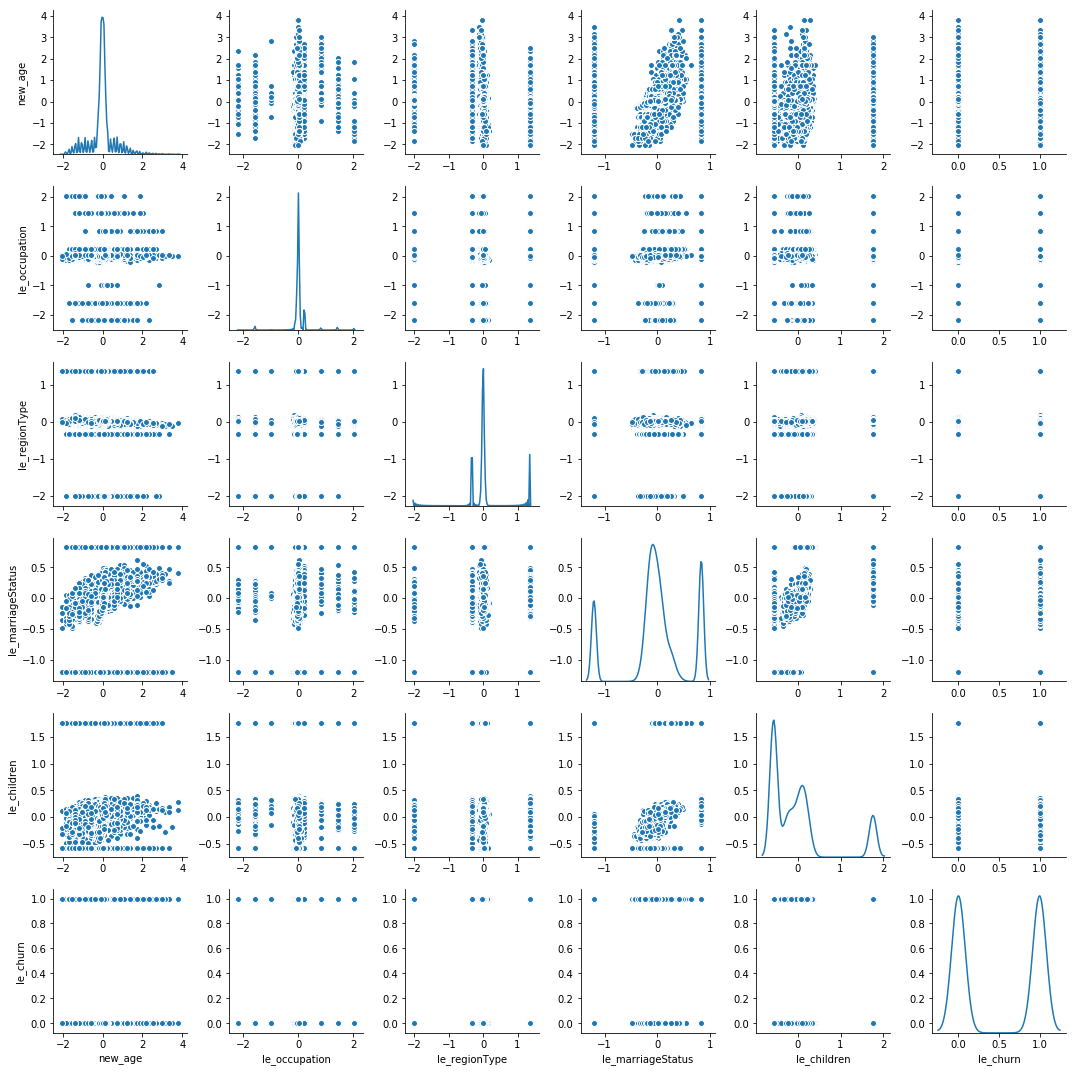

In [104]:
sns.pairplot(temp1, diag_kind='kde')

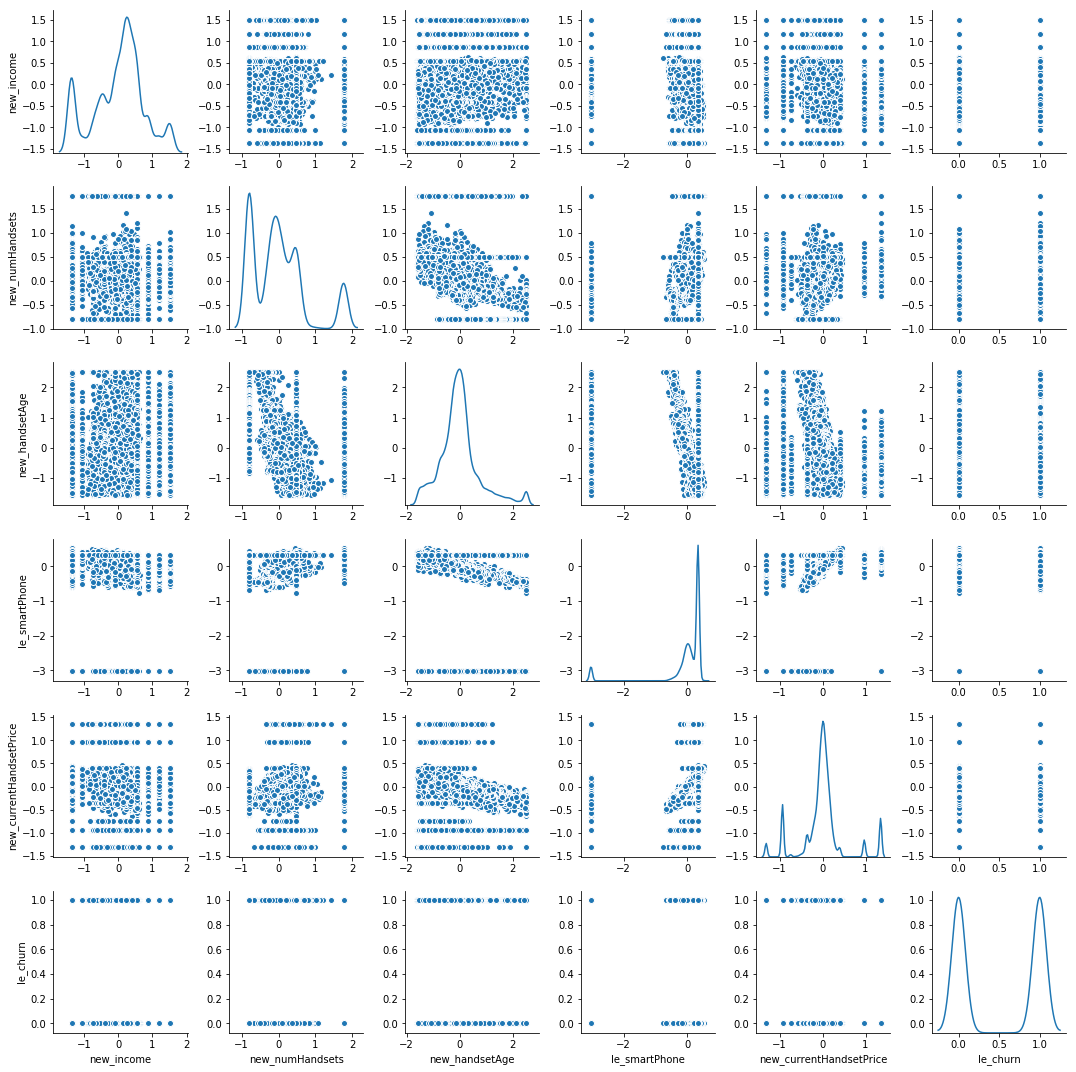

In [105]:
sns.pairplot(temp2, diag_kind='kde')

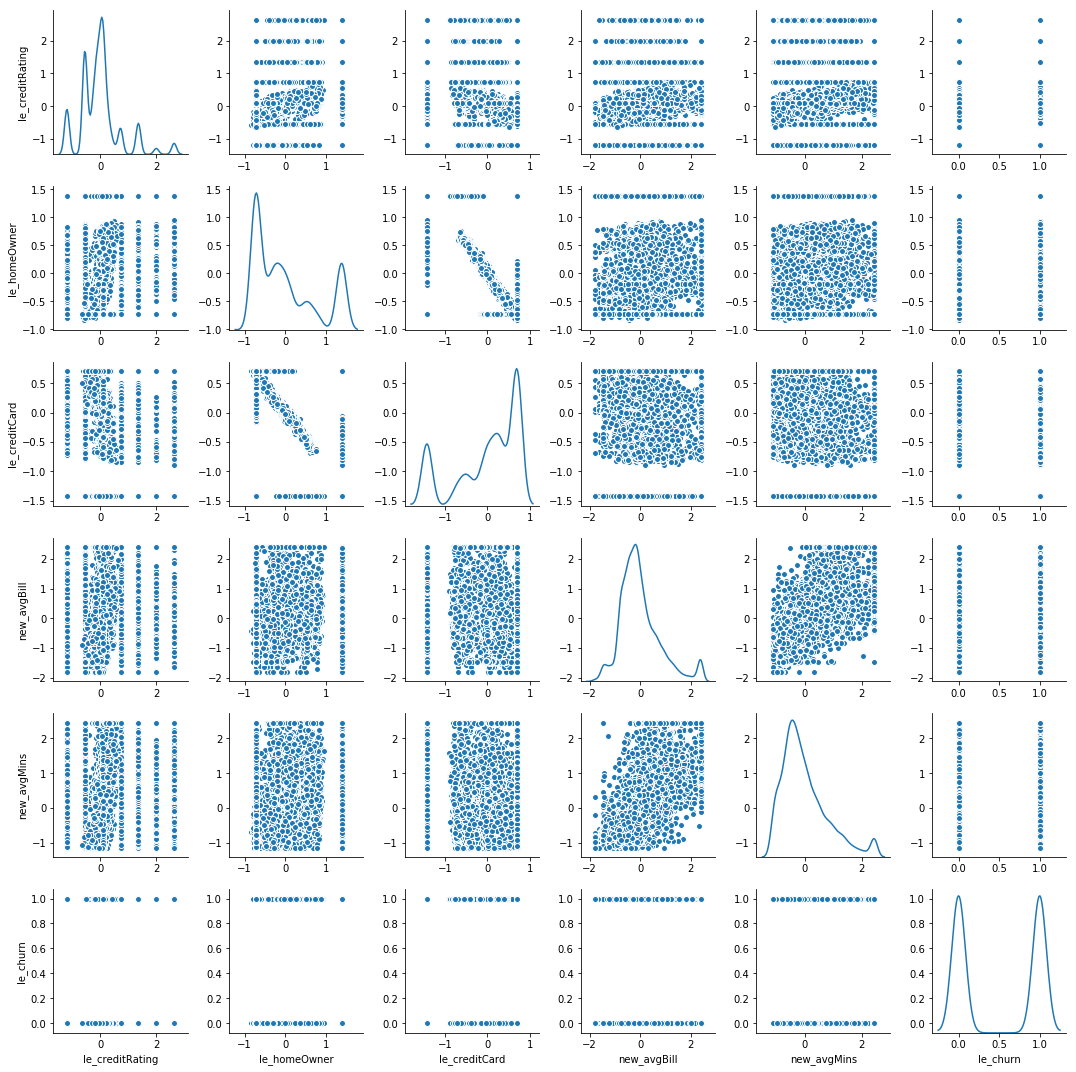

In [106]:
sns.pairplot(temp3, diag_kind='kde')

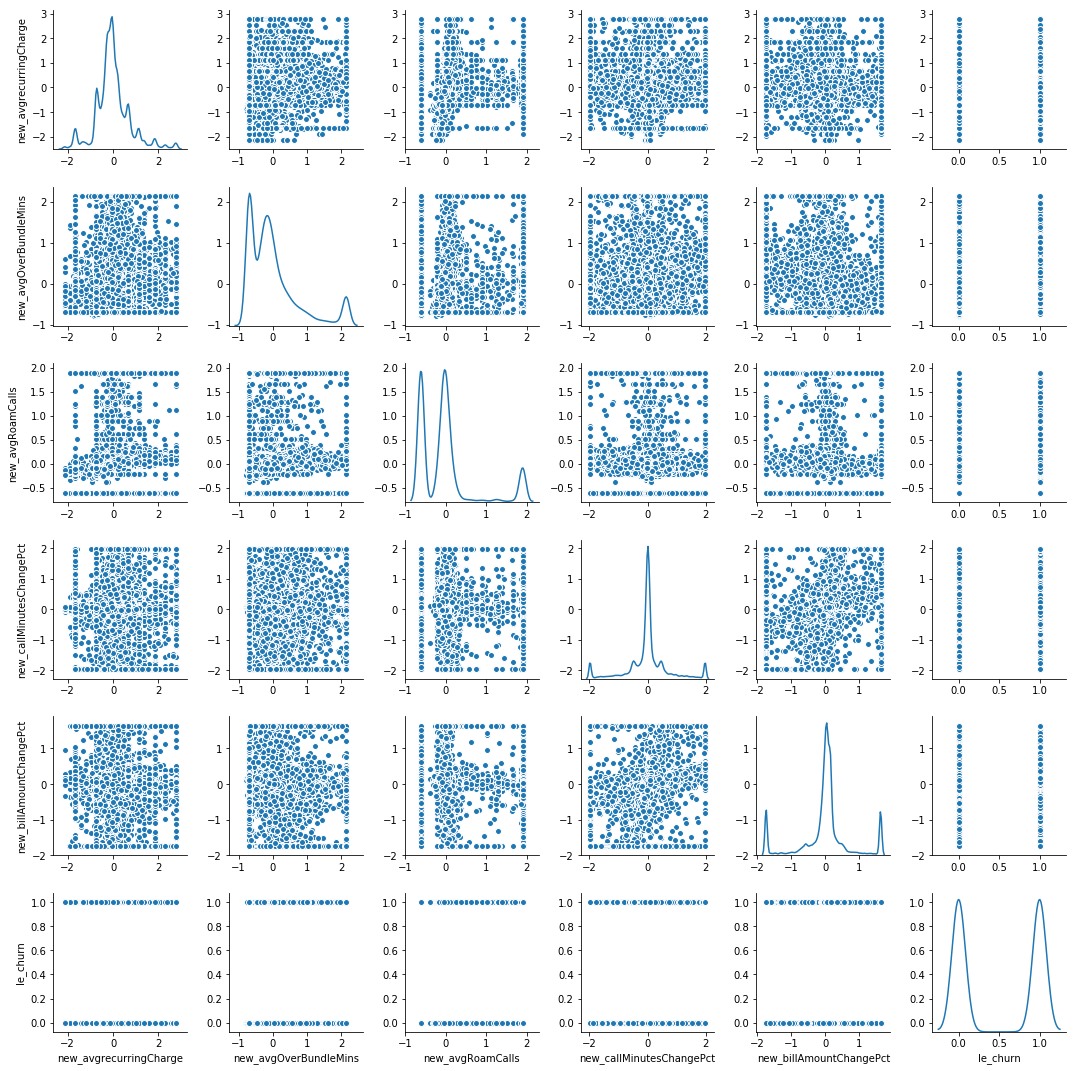

In [107]:
sns.pairplot(temp4, diag_kind='kde')

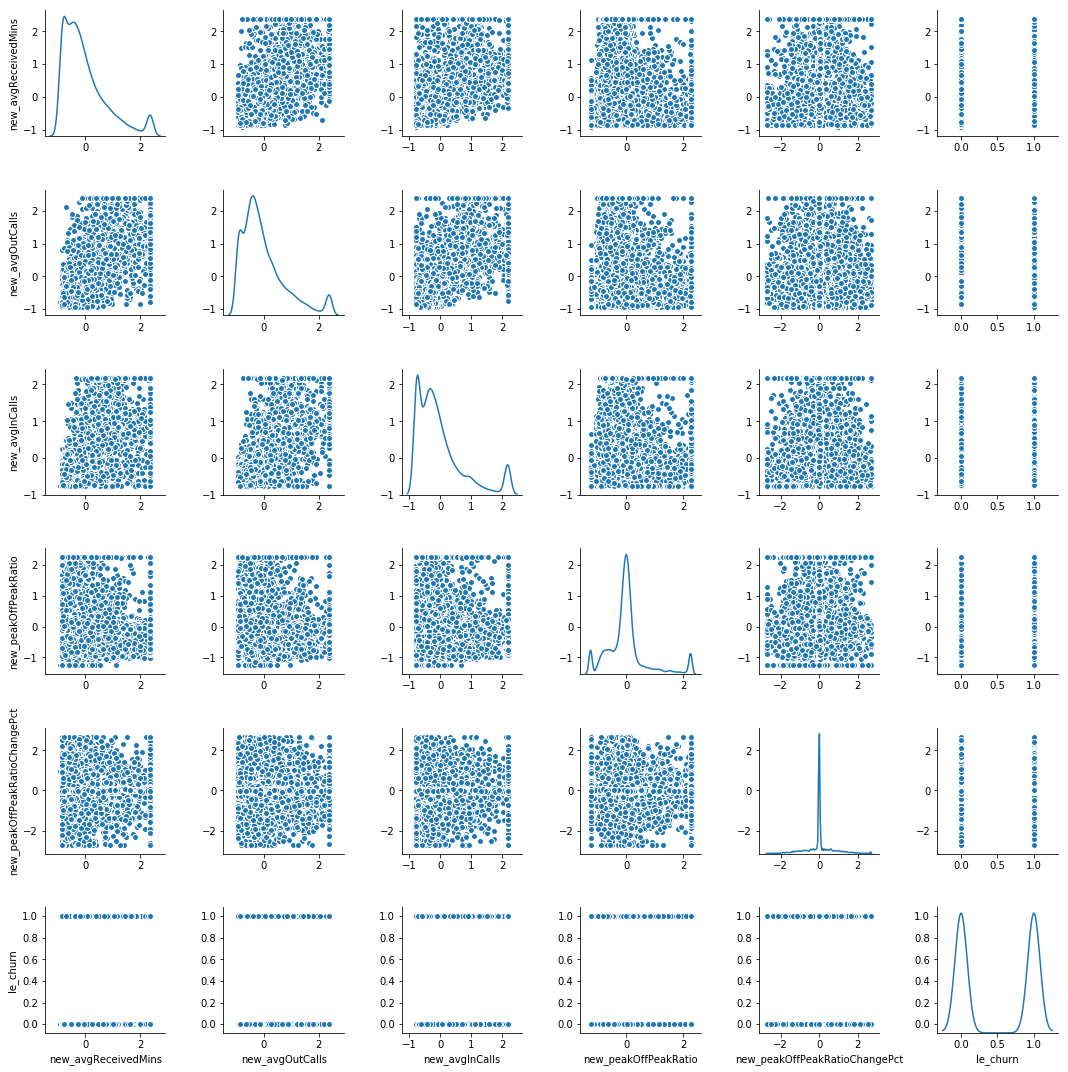

In [108]:
sns.pairplot(temp5, diag_kind='kde')

Text(0.5,1,'Correlation matrix\n')

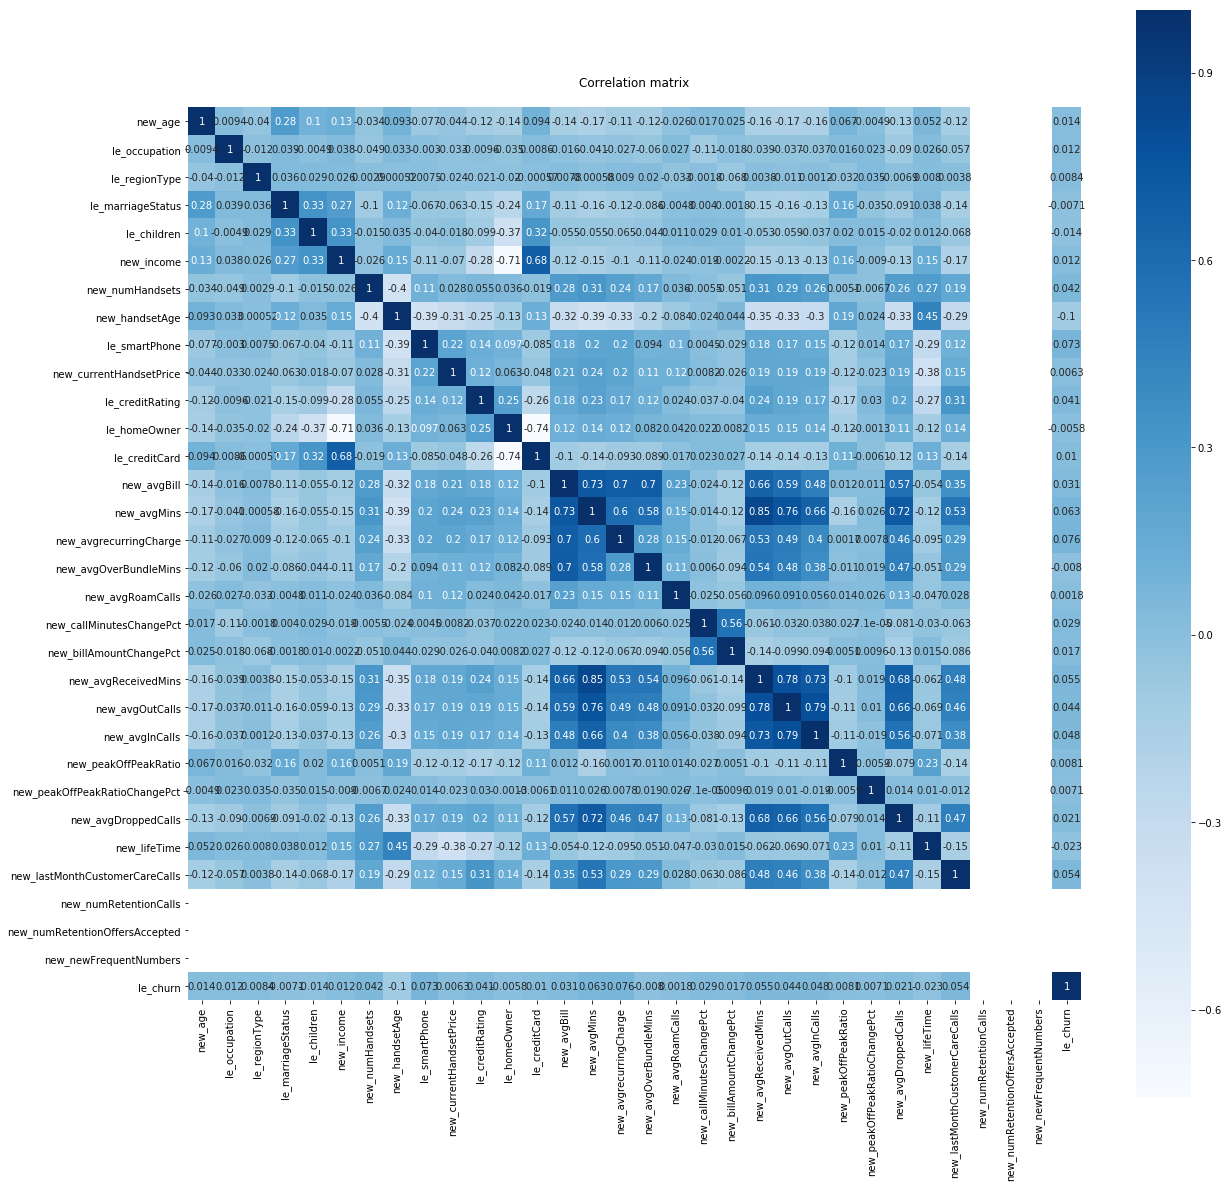

In [109]:
# Correlation martix for 'data_imputed' dataframe
corr = data_imputed.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='Blues')
plt.title('Correlation matrix\n')

In [110]:
print(data_imputed.shape)

(10000, 32)


# Dropping few highly correlated variables

'le_creditCard', 'new_avgrecurringCharge', 'new_avgOverBundleMins', 'new_avgReceivedMins', 'new_avgOutCalls', 'new_avgInCalls', 'new_avgDroppedCalls' 


In [111]:
model_input_df = data_imputed[['new_age', 'le_occupation', 'le_regionType', 'le_marriageStatus', 'le_children', 'new_income',
                     'new_numHandsets', 'new_handsetAge', 'le_smartPhone', 'new_currentHandsetPrice', 'le_creditRating',
                     'le_homeOwner', 'new_avgBill', 'new_avgMins', 'new_avgRoamCalls', 'new_callMinutesChangePct',
                     'new_billAmountChangePct', 'new_peakOffPeakRatio', 'new_peakOffPeakRatioChangePct', 'new_lifeTime',
                     'new_lastMonthCustomerCareCalls', 'new_numRetentionCalls', 'new_numRetentionOffersAccepted',
                     'new_newFrequentNumbers', 'le_churn']]

print('Shape:', model_input_df.shape)

model_input_df.head()

Shape: (10000, 25)


,new_age,le_occupation,le_regionType,le_marriageStatus,le_children,new_income,new_numHandsets,new_handsetAge,le_smartPhone,new_currentHandsetPrice,...,new_callMinutesChangePct,new_billAmountChangePct,new_peakOffPeakRatio,new_peakOffPeakRatioChangePct,new_lifeTime,new_lastMonthCustomerCareCalls,new_numRetentionCalls,new_numRetentionOffersAccepted,new_newFrequentNumbers,le_churn
0,0.128010,0.026382,1.357920,0.831690,-0.082067,-0.235262,-0.793582,2.515959,-3.025274,-0.598956,...,-0.002917,0.164707,0.356429,0.028585,2.636011,-0.680706,0.0,0.0,0.0,1
1,-0.562845,-0.016039,0.035413,-0.090013,-0.030895,0.087472,1.765947,0.328869,-0.277517,-0.378691,...,0.200731,0.134899,0.238677,-0.003137,2.636011,-0.149391,0.0,0.0,0.0,1
2,2.511890,0.226023,1.357920,0.298828,-0.568266,0.861981,0.486183,-1.018936,0.330549,-0.381631,...,-0.029289,0.027906,0.211717,-0.009382,2.636011,-0.387272,0.0,0.0,0.0,1
3,-1.048329,0.026027,0.045297,-0.093303,0.073729,0.543484,1.765947,-0.197225,-0.050065,-1.317319,...,-0.128801,-0.062142,0.190396,-0.002075,0.641404,-0.120732,0.0,0.0,0.0,1
4,-0.886501,0.020138,-0.034161,0.831690,0.265093,0.443645,0.400094,-1.545672,0.330549,0.970681,...,0.540304,1.632987,0.056023,-0.725108,-0.306445,-0.680706,0.0,0.0,0.0,1


# KMeans clustering

In [112]:

X = model_input_df.drop(['le_churn'], axis=1)
y = model_input_df[['le_churn']]

from sklearn.cluster import KMeans

cluster_range = range(1, 15)
cluster_errors = []

for num in cluster_range:
    k_means = KMeans(n_clusters=num)
    k_means.fit(X)
    cluster_errors.append(k_means.inertia_) # within sum of square errors

clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df.sort_values('cluster_errors', ascending=False).head(15)


,cluster_errors,num_clusters
0,100316.241698,1
1,87481.180765,2
2,81554.741307,3
3,76717.153043,4
4,73640.365036,5
5,71004.701220,6
6,68496.727717,7
7,66651.549077,8
8,65013.866957,9
9,63679.567317,10


Text(0.5,1,'Cluster_errors v/s No. of clusters')

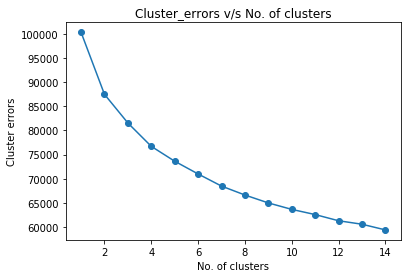

In [113]:
# Elbow plot
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
# Title and axis
plt.xlabel('No. of clusters')
plt.ylabel('Cluster errors')
plt.title('Cluster_errors v/s No. of clusters')


In [114]:
index = pd.DataFrame(X.index)
index.columns = ['row_index']
#index.head()

# After No. of clusters=3, the cluster-errors converge
k_means = KMeans(n_clusters=3) 
k_means.fit(X)
labels = k_means.labels_

Cluster_label = pd.DataFrame(labels+1) # in KMeans, cluster-labels start from 0
Cluster_label.columns = ['Cluster_label']
#Cluster_label.head()

result_df = pd.DataFrame()
result_df = pd.concat([index, Cluster_label], axis=1)
#result_df.head()

data = pd.DataFrame()
data = pd.concat([X, y, Cluster_label], axis=1, join_axes=[X.index])

print('\nAfter adding "Cluster_label" to the df, shape:', data.shape)

print('\nCluster labels added for the entire dataset')

data.head()


After adding "Cluster_label" to the df, shape: (10000, 26)

Cluster labels added for the entire dataset


,new_age,le_occupation,le_regionType,le_marriageStatus,le_children,new_income,new_numHandsets,new_handsetAge,le_smartPhone,new_currentHandsetPrice,...,new_billAmountChangePct,new_peakOffPeakRatio,new_peakOffPeakRatioChangePct,new_lifeTime,new_lastMonthCustomerCareCalls,new_numRetentionCalls,new_numRetentionOffersAccepted,new_newFrequentNumbers,le_churn,Cluster_label
0,0.128010,0.026382,1.357920,0.831690,-0.082067,-0.235262,-0.793582,2.515959,-3.025274,-0.598956,...,0.164707,0.356429,0.028585,2.636011,-0.680706,0.0,0.0,0.0,1,2
1,-0.562845,-0.016039,0.035413,-0.090013,-0.030895,0.087472,1.765947,0.328869,-0.277517,-0.378691,...,0.134899,0.238677,-0.003137,2.636011,-0.149391,0.0,0.0,0.0,1,2
2,2.511890,0.226023,1.357920,0.298828,-0.568266,0.861981,0.486183,-1.018936,0.330549,-0.381631,...,0.027906,0.211717,-0.009382,2.636011,-0.387272,0.0,0.0,0.0,1,2
3,-1.048329,0.026027,0.045297,-0.093303,0.073729,0.543484,1.765947,-0.197225,-0.050065,-1.317319,...,-0.062142,0.190396,-0.002075,0.641404,-0.120732,0.0,0.0,0.0,1,1
4,-0.886501,0.020138,-0.034161,0.831690,0.265093,0.443645,0.400094,-1.545672,0.330549,0.970681,...,1.632987,0.056023,-0.725108,-0.306445,-0.680706,0.0,0.0,0.0,1,1


# Dataset for each cluster

In [115]:
dataset_clst1 = data.loc[data.Cluster_label == 1]
print('\nCluster-1 dataset shape:', dataset_clst1.shape)
dataset_clst1.head()


Cluster-1 dataset shape: (2444, 26)


,new_age,le_occupation,le_regionType,le_marriageStatus,le_children,new_income,new_numHandsets,new_handsetAge,le_smartPhone,new_currentHandsetPrice,...,new_billAmountChangePct,new_peakOffPeakRatio,new_peakOffPeakRatioChangePct,new_lifeTime,new_lastMonthCustomerCareCalls,new_numRetentionCalls,new_numRetentionOffersAccepted,new_newFrequentNumbers,le_churn,Cluster_label
3,-1.048329,0.026027,0.045297,-0.093303,0.073729,0.543484,1.765947,-0.197225,-0.050065,-1.317319,...,-0.062142,0.190396,-0.002075,0.641404,-0.120732,0.0,0.0,0.0,1,1
4,-0.886501,0.020138,-0.034161,0.831690,0.265093,0.443645,0.400094,-1.545672,0.330549,0.970681,...,1.632987,0.056023,-0.725108,-0.306445,-0.680706,0.0,0.0,0.0,1,1
8,-0.170665,-0.015326,0.003383,-0.089446,-0.074696,0.224986,1.415067,-1.076548,0.330549,1.351728,...,-1.736269,1.732349,-0.066190,2.636011,1.956733,0.0,0.0,0.0,1,1
11,-0.172872,0.013919,-0.040191,-1.202371,-0.066984,0.046701,1.765947,-1.179426,0.330549,0.182817,...,-0.130488,-0.083282,1.639127,0.066216,0.229561,0.0,0.0,0.0,1,1
19,0.569952,0.047956,-0.329959,0.831690,0.172024,0.543484,0.904329,-0.183565,0.330549,-1.317319,...,1.417600,0.174922,-0.820230,2.636011,0.450565,0.0,0.0,0.0,1,1


In [116]:
dataset_clst2 = data.loc[data.Cluster_label == 2]
print('\nCluster-2 dataset shape:', dataset_clst2.shape)
dataset_clst2.head()


Cluster-2 dataset shape: (4883, 26)


,new_age,le_occupation,le_regionType,le_marriageStatus,le_children,new_income,new_numHandsets,new_handsetAge,le_smartPhone,new_currentHandsetPrice,...,new_billAmountChangePct,new_peakOffPeakRatio,new_peakOffPeakRatioChangePct,new_lifeTime,new_lastMonthCustomerCareCalls,new_numRetentionCalls,new_numRetentionOffersAccepted,new_newFrequentNumbers,le_churn,Cluster_label
0,0.128010,0.026382,1.357920,0.831690,-0.082067,-0.235262,-0.793582,2.515959,-3.025274,-0.598956,...,0.164707,0.356429,0.028585,2.636011,-0.680706,0.0,0.0,0.0,1,2
1,-0.562845,-0.016039,0.035413,-0.090013,-0.030895,0.087472,1.765947,0.328869,-0.277517,-0.378691,...,0.134899,0.238677,-0.003137,2.636011,-0.149391,0.0,0.0,0.0,1,2
2,2.511890,0.226023,1.357920,0.298828,-0.568266,0.861981,0.486183,-1.018936,0.330549,-0.381631,...,0.027906,0.211717,-0.009382,2.636011,-0.387272,0.0,0.0,0.0,1,2
5,0.237051,-0.984400,-2.017837,0.831690,1.759739,0.861981,1.765947,-0.027175,-0.217778,-1.317319,...,0.159064,2.258645,-1.725822,0.864869,-0.680706,0.0,0.0,0.0,1,2
6,0.058602,0.026394,0.007148,-0.035318,-0.568266,0.336938,0.421822,0.699179,-0.367307,-0.431083,...,-0.076641,0.271506,-0.054441,2.636011,-0.195982,0.0,0.0,0.0,1,2


In [117]:
dataset_clst3 = data.loc[data.Cluster_label == 3]
print('\nCluster-3 dataset shape:', dataset_clst3.shape)
dataset_clst3.head()


Cluster-3 dataset shape: (2673, 26)


,new_age,le_occupation,le_regionType,le_marriageStatus,le_children,new_income,new_numHandsets,new_handsetAge,le_smartPhone,new_currentHandsetPrice,...,new_billAmountChangePct,new_peakOffPeakRatio,new_peakOffPeakRatioChangePct,new_lifeTime,new_lastMonthCustomerCareCalls,new_numRetentionCalls,new_numRetentionOffersAccepted,new_newFrequentNumbers,le_churn,Cluster_label
18,0.019879,0.012435,0.027521,-0.183776,-0.368864,-1.367500,1.765947,0.330670,-0.240501,-0.368560,...,0.064224,-0.438317,-0.036221,2.636011,-0.309761,0.0,0.0,0.0,1,3
27,0.023667,0.025063,-0.329959,-0.095569,-0.309227,-1.367500,0.486183,0.677875,-0.262683,-0.338709,...,1.465678,0.798755,0.037389,2.636011,-0.680706,0.0,0.0,0.0,1,3
34,-0.028558,-0.020585,-0.015754,-0.131666,-0.568266,-1.367500,0.279929,-1.339916,0.330549,0.017347,...,0.006041,0.069347,-0.937965,-0.229374,-0.046139,0.0,0.0,0.0,1,3
45,-0.050204,-0.053083,0.002626,-0.101043,-0.319800,-0.708841,0.060266,-0.278213,0.330549,0.036406,...,-0.009297,-0.487682,-1.834008,-0.156907,1.956733,0.0,0.0,0.0,1,3
55,0.023899,0.014842,0.004507,-0.114899,-0.568266,0.117759,0.032055,-0.883137,0.330549,0.059320,...,0.070699,-1.261674,-0.677741,-0.325826,-0.176281,0.0,0.0,0.0,1,3


# Classifiers

In [118]:
def classifiers(X_train, X_test, y_train, y_test):
    
    # Logistic Regression
      
    logit_model = LogisticRegression()
    logit_model.fit(X_train, y_train)
    accuracy = logit_model.score(X_test, y_test)
    y_pred = logit_model.predict(X_test)
    print('\nLogistic Regression model accuracy score = ', round(accuracy, 4))

    # Gaussian Naive Bayes Classifier

    gnb_clf = GaussianNB()
    gnb_clf.fit(X_train, y_train)
    accuracy = gnb_clf.score(X_test, y_test)
    y_pred = gnb_clf.predict(X_test)
    print('\nGaussian Navie Bayes Model accuracy = ', round(accuracy, 4))
    
    # K-Nearest Neighbors Classifier

    knn_clf = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
    knn_clf.fit(X_train, y_train)
    accuracy = knn_clf.score(X_test, y_test)
    y_pred = knn_clf.predict(X_test)
    print('\nKNN Model accuracy = ', round(accuracy, 4))
    
    knn_clf = KNeighborsClassifier(n_jobs=-1, metric = 'euclidean')
    k_neighbors = np.arange(5, 500, 5)
    scores = []

    for n in k_neighbors:
        knn_clf.set_params(n_neighbors=n)
        knn_clf.fit(X_train, y_train)
        scores.append(knn_clf.score(X_test, y_test))   
    
    i=0
    for score in scores:
        if score==max(scores):
            k = k_neighbors.tolist()[i]    
            print('n_neighbors = ', k)
            break
        i=i+1       
        
    knn_clf = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn_clf.fit(X_train, y_train)
    accuracy = knn_clf.score(X_test, y_test)
    y_pred = knn_clf.predict(X_test)
    print('KNN Model accuracy  with {0} as n_neighbors = {1}'.format(k, round(accuracy, 4)))
    
    # Support Vector Machine for Classification
    
    svm_clf = SVC()
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test, y_test)
    y_pred = svm_clf.predict(X_test)
    print('\nSVM (classifier) Model accuracy  = ', round(accuracy, 4))
    
    # Decision Tree Classifier
    
    dt_clf = DecisionTreeClassifier(criterion = 'entropy')
    dt_clf.fit(X_train, y_train)
    accuracy = dt_clf.score(X_test , y_test)
    y_pred = dt_clf.predict(X_test)
    print('\nDecision Tree Model accuracy = ', round(accuracy, 4))
    
    dt_clf = DecisionTreeClassifier(criterion = 'entropy')
    max_depth_est = np.arange(5, 500, 5)
    scores = []

    for n in max_depth_est:
        dt_clf.set_params(max_depth=n)
        dt_clf.fit(X_train, y_train)
        scores.append(dt_clf.score(X_test, y_test))   
    
    i=0
    for score in scores:
        if score==max(scores):
            d = max_depth_est.tolist()[i]
            print('max_depth = ', d)
            i = i+1
            break      
        
    dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
    dt_clf.fit(X_train, y_train)
    accuracy = dt_clf.score(X_test , y_test)
    y_pred = dt_clf.predict(X_test)
    print('Decision Tree Model accuracy with {0} as max_depth = {1}'.format(d, round(accuracy, 4)))
    
    #Boosting Algorithm: AdaBoost Classifier

    dt = DecisionTreeClassifier() 
    AdaBoost_clf = AdaBoostClassifier(base_estimator=dt)# decision tree is used as a base estimator
    AdaBoost_clf.fit(X_train,y_train)
    accuracy = AdaBoost_clf.score(X_test, y_test)
    y_pred = AdaBoost_clf.predict(X_test)
    print('\nAdaBoost Model accuracy = ', round(accuracy, 4))
    
    #Cross-validation of AdaBoost model
    
    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])
    
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    AdaBoost_clf = AdaBoostClassifier(random_state=7)
    accuracy = model_selection.cross_val_score(AdaBoost_clf, X, y, cv=kfold)
    print('KFold cross-validation: AdaBoost model accuracy = ', round(accuracy.mean(), 4))
    
    #Bagging Algorithm: Random Forest Classifier

    rf_clf = RandomForestClassifier(criterion = 'gini')
    rf_clf = rf_clf.fit(X_train, y_train)
    accuracy = rf_clf.score(X_test, y_test)
    y_pred = rf_clf.predict(X_test)
    print('\nRandom Forest Model accuracy = ', round(accuracy, 4))
    
    #Calculate n_estmators
    rf_clf = RandomForestClassifier(criterion = 'gini')
    estimators = np.arange(5, 500, 5)
    scores = []

    for n in estimators:
        rf_clf.set_params(n_estimators=n)
        rf_clf.fit(X_train, y_train)
        scores.append(rf_clf.score(X_test, y_test))   
    
    i=0
    for score in scores:
        if score==max(scores):
            n = estimators.tolist()[i]
            print('n_estmators = ', n)
            i = i+1
            break
        
    rf_clf = RandomForestClassifier(criterion = 'gini', n_estimators=n)
    rf_clf = rf_clf.fit(X_train, y_train)
    accuracy = rf_clf.score(X_test, y_test)
    y_pred = rf_clf.predict(X_test)
    print('Random Forest Model accuracy with {0} as n_estimators = {1}'.format(n, round(accuracy, 4)))   
        
    

# Cluster-1

In [119]:
X = dataset_clst1.drop(['le_churn', 'Cluster_label'], axis=1)
y = dataset_clst1[['le_churn']]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=7)

In [121]:
X_train.shape

(1710, 24)

In [122]:
X_test.shape

(734, 24)

In [123]:
print('\n**********Model accuracies for different classifiers:**********')
classifiers(X_train, X_test, y_train, y_test)



**********Model accuracies for different classifiers:**********

Logistic Regression model accuracy score =  0.5395

Gaussian Navie Bayes Model accuracy =  0.5409

KNN Model accuracy =  0.5177
n_neighbors =  440
KNN Model accuracy  with 440 as n_neighbors = 0.5354

SVM (classifier) Model accuracy  =  0.5272

Decision Tree Model accuracy =  0.4932
max_depth =  5
Decision Tree Model accuracy with 5 as max_depth = 0.5545

AdaBoost Model accuracy =  0.5368
KFold cross-validation: AdaBoost model accuracy =  0.5348

Random Forest Model accuracy =  0.5218
n_estmators =  5
Random Forest Model accuracy with 5 as n_estimators = 0.5136


# Cluster-1 insights:

In [124]:
clust1_row_indices = dataset_clst1.index.tolist()

print('\nlength of clust1_row_indices:', len(clust1_row_indices))

cluster1_df = df_full.iloc[clust1_row_indices]
print('\nShape of cluster1_df:', cluster1_df.shape)
cluster1_df.head(15)


length of clust1_row_indices: 2444

Shape of cluster1_df: (2444, 65)


,customer_id,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,new_newFrequentNumbers,le_occupation,le_regionType,le_marriageStatus,le_children,le_smartPhone,le_creditRating,le_homeOwner,le_creditCard,le_churn
3,1000063,30,missing,suburban,no,no,6,3,122,yes,...,0,NaN,2.0,1.0,0,1,2,0,1,1
4,1000085,32,missing,town,yes,no,7,8,10,yes,...,0,NaN,3.0,2.0,0,1,0,0,1,1
8,1000143,40,missing,missing,missing,no,5,11,124,yes,...,0,NaN,NaN,NaN,0,1,2,1,0,1
11,1000230,32,missing,missing,no,no,3,5,99,yes,...,0,NaN,NaN,1.0,0,1,3,0,1,1
19,1000481,50,missing,suburban,yes,no,6,5,341,yes,...,0,NaN,2.0,2.0,0,1,3,0,1,1
20,1000511,38,clerical,suburban,no,no,5,6,268,yes,...,0,0.0,2.0,1.0,0,1,0,0,1,1
22,1000566,42,missing,missing,missing,no,5,5,99,yes,...,0,NaN,NaN,NaN,0,1,0,1,0,1
23,1000609,34,missing,suburban,no,no,7,5,163,yes,...,0,NaN,2.0,1.0,0,1,0,0,1,1
24,1000630,34,missing,suburban,yes,no,6,4,147,yes,...,0,NaN,2.0,2.0,0,1,0,0,1,1
25,1000636,56,missing,suburban,no,yes,9,14,39,yes,...,0,NaN,2.0,1.0,1,1,2,0,1,1


In [125]:
print("\nCluster-1: crosstab 'churn' vs 'occupation' count% against each category")
pd.crosstab(cluster1_df['churn'], cluster1_df['occupation'], rownames=['churn'], colnames=['occupation']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-1: crosstab 'churn' vs 'occupation' count% against each category


occupation,clerical,crafts,homemaker,missing,professional,retired,self_employed,student
churn,,,,,,,,
churned,54.55,33.78,100.0,45.71,51.99,40.0,48.84,40.0
not-churned,45.45,66.22,0.0,54.29,48.01,60.0,51.16,60.0


### Insight: 
Hightest 'churn' rate of customer base: **homemaker (100%)**

Highest 'not-churned' rate of customer base (loyal customers): **crafts (66.22%)**

In [126]:
print("\nCluster-1: crosstab 'churn' vs 'regionType' count% against each category")
pd.crosstab(cluster1_df['churn'], cluster1_df['regionType'], rownames=['churn'], colnames=['regionType']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-1: crosstab 'churn' vs 'regionType' count% against each category


regionType,missing,rural,suburban,town
churn,,,,
churned,44.88,48.39,47.91,48.39
not-churned,55.12,51.61,52.09,51.61


### Insight: 
Hightest 'churn' rate of customer base: **rural (48.39%) and town (48.39%)**

Highest 'not-churned' rate of customer base (loyal customers): **missing (55.12%) followed by suburban (52.09%)**

In [127]:
print("\nCluster-1: crosstab 'churn' vs 'marriageStatus' count% against each category")
pd.crosstab(cluster1_df['churn'], cluster1_df['marriageStatus'], rownames=['churn'], colnames=['marriageStatus']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-1: crosstab 'churn' vs 'marriageStatus' count% against each category


marriageStatus,missing,no,yes
churn,,,
churned,47.73,44.36,46.38
not-churned,52.27,55.64,53.62


### Insight: 
Hightest 'churn' rate of customer base: **missing (47.73%), followed by married (46.38%)**

Highest 'not-churned' rate of customer base (loyal customers): **un-married (55.64%)**

In [128]:
print("\nCluster-1: crosstab 'churn' vs 'children' count% against each category")
pd.crosstab(cluster1_df['churn'], cluster1_df['children'], rownames=['churn'], colnames=['children']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-1: crosstab 'churn' vs 'children' count% against each category


children,no,yes
churn,,
churned,45.51,49.25
not-churned,54.49,50.75


### Insight: 
Hightest 'churn' rate of customer base: **customers having children (49.25%)**

Highest 'not-churned' rate of customer base (loyal customers): **customers not having children (54.49%)**

In [129]:
print("\nCluster-1: crosstab 'churn' vs 'smartPhone' count% against each category")
pd.crosstab(cluster1_df['churn'], cluster1_df['smartPhone'], rownames=['churn'], colnames=['smartPhone']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-1: crosstab 'churn' vs 'smartPhone' count% against each category


smartPhone,no,yes
churn,,
churned,54.9,46.13
not-churned,45.1,53.87


### Insight: 
Hightest 'churn' rate of customer base: **customers not having smart phone (54.9%)**

Highest 'not-churned' rate of customer base (loyal customers): **customers having smart phone (53.87%)**

In [130]:
print("\nCluster-1: crosstab 'churn' vs 'creditRating' count% against each category")
pd.crosstab(cluster1_df['churn'], cluster1_df['creditRating'], rownames=['churn'], colnames=['creditRating']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-1: crosstab 'churn' vs 'creditRating' count% against each category


creditRating,A,B,C,D,E,F,G
churn,,,,,,,
churned,45.56,51.01,50.3,38.37,40.21,59.72,45.06
not-churned,54.44,48.99,49.7,61.63,59.79,40.28,54.94


### Insight: 
Hightest 'churn' rate of customer base: **customers having credit-rating 'F' (59.72%)**

Highest 'not-churned' rate of customer base (loyal customers): **customers having credit-rating 'E' (59.79%)**

In [131]:
print("\nCluster-1: crosstab 'churn' vs 'homeOwner' count% against each category")
pd.crosstab(cluster1_df['churn'], cluster1_df['homeOwner'], rownames=['churn'], colnames=['homeOwner']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-1: crosstab 'churn' vs 'homeOwner' count% against each category


homeOwner,no,yes
churn,,
churned,46.26,46.42
not-churned,53.74,53.58


### Insight: 
There is not much of a difference in churn rate among homeowners and non-homeowners

In [132]:
print("\nCluster-1: crosstab 'churn' vs 'creditCard' count% against each category")
pd.crosstab(cluster1_df['churn'], cluster1_df['creditCard'], rownames=['churn'], colnames=['creditCard']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-1: crosstab 'churn' vs 'creditCard' count% against each category


creditCard,no,yes
churn,,
churned,47.06,45.93
not-churned,52.94,54.07


### Insight: 
Hightest 'churn' rate of customer base: **customers not having credit-card (47.06%)**

Highest 'not-churned' rate of customer base (loyal customers): **customers having credit-card (54.07%)**

# Cluster-2

In [133]:
X = dataset_clst2.drop(['le_churn', 'Cluster_label'], axis=1)
y = dataset_clst2[['le_churn']]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=7)

In [135]:
X_train.shape

(3418, 24)

In [136]:
X_test.shape

(1465, 24)

In [137]:
print('\n**********Model accuracies for different classifiers:**********')
classifiers(X_train, X_test, y_train, y_test)



**********Model accuracies for different classifiers:**********

Logistic Regression model accuracy score =  0.5638

Gaussian Navie Bayes Model accuracy =  0.529

KNN Model accuracy =  0.5235
n_neighbors =  445
KNN Model accuracy  with 445 as n_neighbors = 0.5358

SVM (classifier) Model accuracy  =  0.5502

Decision Tree Model accuracy =  0.501
max_depth =  5
Decision Tree Model accuracy with 5 as max_depth = 0.5324

AdaBoost Model accuracy =  0.5126
KFold cross-validation: AdaBoost model accuracy =  0.545

Random Forest Model accuracy =  0.529
n_estmators =  5
Random Forest Model accuracy with 5 as n_estimators = 0.5358


# Cluster-2 insights:

In [138]:
clust2_row_indices = dataset_clst2.index.tolist()

print('\nlength of clust2_row_indices:', len(clust2_row_indices))

cluster2_df = df_full.iloc[clust2_row_indices]
print('\nShape of cluster2_df:', cluster2_df.shape)
cluster2_df.head(15)


length of clust2_row_indices: 4883

Shape of cluster2_df: (4883, 65)


,customer_id,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,new_newFrequentNumbers,le_occupation,le_regionType,le_marriageStatus,le_children,le_smartPhone,le_creditRating,le_homeOwner,le_creditCard,le_churn
0,1000004,26,crafts,town,yes,yes,6,1,1812,no,...,0,1.0,3.0,2.0,1,0,2,1,1,1
1,1000012,36,missing,missing,yes,yes,9,4,544,yes,...,0,NaN,NaN,2.0,1,1,0,0,1,1
2,1000034,74,professional,town,yes,no,7,2,138,yes,...,0,4.0,3.0,2.0,0,1,0,0,1,1
5,1000100,40,homemaker,rural,yes,yes,7,4,161,yes,...,0,2.0,1.0,2.0,1,1,0,0,1,1
6,1000121,52,missing,missing,no,no,3,1,1619,no,...,0,NaN,NaN,1.0,0,0,3,0,1,1
7,1000135,32,clerical,missing,yes,no,5,3,10,yes,...,0,0.0,NaN,2.0,0,1,4,0,1,1
9,1000164,42,missing,missing,yes,yes,4,2,517,yes,...,0,NaN,NaN,2.0,1,1,0,0,0,1
10,1000196,0,missing,missing,missing,no,0,4,831,no,...,0,NaN,NaN,NaN,0,0,6,1,0,1
12,1000265,54,self_employed,suburban,yes,no,7,4,443,yes,...,0,6.0,2.0,2.0,0,1,1,0,1,1
13,1000312,54,missing,missing,yes,no,9,3,53,yes,...,0,NaN,NaN,2.0,0,1,0,0,1,1


In [139]:
print("\nCluster-2: crosstab 'churn' vs 'occupation' count% against each category")
pd.crosstab(cluster2_df['churn'], cluster2_df['occupation'], rownames=['churn'], colnames=['occupation']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-2: crosstab 'churn' vs 'occupation' count% against each category


occupation,clerical,crafts,homemaker,missing,professional,retired,self_employed,student
churn,,,,,,,,
churned,57.34,56.07,33.33,51.94,49.32,46.53,41.98,74.36
not-churned,42.66,43.93,66.67,48.06,50.68,53.47,58.02,25.64


### Insight: 
Hightest 'churn' rate of customer base: **student (74.36%)**

Highest 'not-churned' rate of customer base (loyal customers): **homemaker (66.67%)**

In [140]:
print("\nCluster-2: crosstab 'churn' vs 'regionType' count% against each category")
pd.crosstab(cluster2_df['churn'], cluster2_df['regionType'], rownames=['churn'], colnames=['regionType']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-2: crosstab 'churn' vs 'regionType' count% against each category


regionType,missing,rural,suburban,town
churn,,,,
churned,51.39,57.75,49.75,52.05
not-churned,48.61,42.25,50.25,47.95


### Insight: 
Hightest 'churn' rate of customer base: **rural (57.75%)**

Highest 'not-churned' rate of customer base (loyal customers): **suburban (50.25%)**

In [141]:
print("\nCluster-2: crosstab 'churn' vs 'marriageStatus' count% against each category")
pd.crosstab(cluster2_df['churn'], cluster2_df['marriageStatus'], rownames=['churn'], colnames=['marriageStatus']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-2: crosstab 'churn' vs 'marriageStatus' count% against each category


marriageStatus,missing,no,yes
churn,,,
churned,52.94,51.54,50.6
not-churned,47.06,48.46,49.4


### Insight: 
Hightest 'churn' rate of customer base: **missing (52.94%) followed by un-married (51.54%)**

Highest 'not-churned' rate of customer base (loyal customers): **married (49.4%)**

In [142]:
print("\nCluster-2: crosstab 'churn' vs 'children' count% against each category")
pd.crosstab(cluster2_df['churn'], cluster2_df['children'], rownames=['churn'], colnames=['children']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-2: crosstab 'churn' vs 'children' count% against each category


children,no,yes
churn,,
churned,51.09,51.61
not-churned,48.91,48.39


### Insight: 
There is not much of a difference in churn rate among customers having children and not having children

In [143]:
print("\nCluster-2: crosstab 'churn' vs 'smartPhone' count% against each category")
pd.crosstab(cluster2_df['churn'], cluster2_df['smartPhone'], rownames=['churn'], colnames=['smartPhone']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-2: crosstab 'churn' vs 'smartPhone' count% against each category


smartPhone,no,yes
churn,,
churned,63.48,48.98
not-churned,36.52,51.02


### Insight: 
Hightest 'churn' rate of customer base: **customers not having smart-phone (63.48%)**

Highest 'not-churned' rate of customer base (loyal customers): **customers having smart-phone (51.02%)**

In [144]:
print("\nCluster-2: crosstab 'churn' vs 'creditRating' count% against each category")
pd.crosstab(cluster2_df['churn'], cluster2_df['creditRating'], rownames=['churn'], colnames=['creditRating']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-2: crosstab 'churn' vs 'creditRating' count% against each category


creditRating,A,B,C,D,E,F,G
churn,,,,,,,
churned,54.72,49.4,53.83,48.42,49.62,47.69,46.81
not-churned,45.28,50.6,46.17,51.58,50.38,52.31,53.19


### Insight: 
Hightest 'churn' rate of customer base: **customers having credit-rating 'A' (54.72%)**

Highest 'not-churned' rate of customer base (loyal customers): **customers having credit-rating 'G' (53.19%)**

In [145]:
print("\nCluster-2: crosstab 'churn' vs 'homeOwner' count% against each category")
pd.crosstab(cluster2_df['churn'], cluster2_df['homeOwner'], rownames=['churn'], colnames=['homeOwner']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-2: crosstab 'churn' vs 'homeOwner' count% against each category


homeOwner,no,yes
churn,,
churned,51.1,53.58
not-churned,48.9,46.42


### Insight: 
Hightest 'churn' rate of customer base: **homer-owners (53.58%)**

Highest 'not-churned' rate of customer base (loyal customers): **non-home-owners(48.9%)**


In [146]:
print("\nCluster-2: crosstab 'churn' vs 'creditCard' count% against each category")
pd.crosstab(cluster2_df['churn'], cluster2_df['creditCard'], rownames=['churn'], colnames=['creditCard']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-2: crosstab 'churn' vs 'creditCard' count% against each category


creditCard,no,yes
churn,,
churned,51.65,51.24
not-churned,48.35,48.76


### Insight: 
There is not much of a difference in the churn rate among customers having credit card and not having credit card

# Cluster-3

In [147]:
X = dataset_clst3.drop(['le_churn', 'Cluster_label'], axis=1)
y = dataset_clst3[['le_churn']]

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=7)

In [149]:
X_train.shape

(1871, 24)

In [150]:
X_test.shape

(802, 24)

In [151]:
print('\n**********Model accuracies for different classifiers:**********')
classifiers(X_train, X_test, y_train, y_test)



**********Model accuracies for different classifiers:**********

Logistic Regression model accuracy score =  0.5474

Gaussian Navie Bayes Model accuracy =  0.5474

KNN Model accuracy =  0.5374
n_neighbors =  230
KNN Model accuracy  with 230 as n_neighbors = 0.581

SVM (classifier) Model accuracy  =  0.5698

Decision Tree Model accuracy =  0.5486
max_depth =  5
Decision Tree Model accuracy with 5 as max_depth = 0.5499

AdaBoost Model accuracy =  0.5237
KFold cross-validation: AdaBoost model accuracy =  0.569

Random Forest Model accuracy =  0.52
n_estmators =  5
Random Forest Model accuracy with 5 as n_estimators = 0.5524


# Cluster-3 insights:

In [152]:
clust3_row_indices = dataset_clst3.index.tolist()

print('\nlength of clust3_row_indices:', len(clust3_row_indices))

cluster3_df = df_full.iloc[clust3_row_indices]
print('\nShape of cluster3_df:', cluster3_df.shape)
cluster3_df.head(15)


length of clust3_row_indices: 2673

Shape of cluster3_df: (2673, 65)


,customer_id,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,new_newFrequentNumbers,le_occupation,le_regionType,le_marriageStatus,le_children,le_smartPhone,le_creditRating,le_homeOwner,le_creditCard,le_churn
18,1000455,0,missing,missing,missing,no,0,5,767,yes,...,0,NaN,NaN,NaN,0,1,0,1,0,1
27,1000662,0,missing,suburban,missing,no,0,2,620,yes,...,0,NaN,2.0,NaN,0,1,0,1,0,1
34,1000842,0,missing,missing,missing,no,0,4,60,yes,...,0,NaN,NaN,NaN,0,1,0,1,0,1
45,1001041,0,missing,missing,missing,no,0,21,318,yes,...,0,NaN,NaN,NaN,0,1,1,1,0,1
55,1001219,26,missing,suburban,missing,no,7,5,171,yes,...,0,NaN,2.0,NaN,0,1,0,0,1,1
56,1001231,0,missing,missing,missing,no,0,3,636,yes,...,0,NaN,NaN,NaN,0,1,0,1,0,1
58,1001276,0,missing,suburban,missing,no,0,1,1375,no,...,0,NaN,2.0,NaN,0,0,0,1,0,1
63,1001339,0,missing,missing,missing,no,0,8,174,yes,...,0,NaN,NaN,NaN,0,1,3,1,0,1
72,1001551,0,missing,missing,missing,no,0,2,136,yes,...,0,NaN,NaN,NaN,0,1,0,1,0,1
76,1001636,0,missing,town,missing,no,0,2,32,yes,...,0,NaN,3.0,NaN,0,1,5,1,0,1


In [153]:
print("\nCluster-3: crosstab 'churn' vs 'occupation' count% against each category")
pd.crosstab(cluster3_df['churn'], cluster3_df['occupation'], rownames=['churn'], colnames=['occupation']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-3: crosstab 'churn' vs 'occupation' count% against each category


occupation,clerical,crafts,homemaker,missing,professional,retired,self_employed,student
churn,,,,,,,,
churned,41.67,44.44,50.0,51.43,44.83,50.0,42.86,42.86
not-churned,58.33,55.56,50.0,48.57,55.17,50.0,57.14,57.14


### Insight: 
Hightest 'churn' rate of customer base: **missing (51.43%) followed by homemaker (50%)**

Highest 'not-churned' rate of customer base (loyal customers): **clerical (58.33%)**

In [154]:
print("\nCluster-3: crosstab 'churn' vs 'regionType' count% against each category")
pd.crosstab(cluster3_df['churn'], cluster3_df['regionType'], rownames=['churn'], colnames=['regionType']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-3: crosstab 'churn' vs 'regionType' count% against each category


regionType,missing,rural,suburban,town
churn,,,,
churned,50.35,52.07,51.82,52.37
not-churned,49.65,47.93,48.18,47.63


### Insight: 
Hightest 'churn' rate of customer base: **town (52.37%)**

Highest 'not-churned' rate of customer base (loyal customers): **missing (49.65%) followed by suburban (48.18%)**

In [155]:
print("\nCluster-3: crosstab 'churn' vs 'marriageStatus' count% against each category")
pd.crosstab(cluster3_df['churn'], cluster3_df['marriageStatus'], rownames=['churn'], colnames=['marriageStatus']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-3: crosstab 'churn' vs 'marriageStatus' count% against each category


marriageStatus,missing,no,yes
churn,,,
churned,52.46,49.06,40.59
not-churned,47.54,50.94,59.41


### Insight: 
Hightest 'churn' rate of customer base: **missing (52.46%) followed by un-married (49.06%)**

Highest 'not-churned' rate of customer base (loyal customers): **married (59.41%)**

In [156]:
print("\nCluster-3: crosstab 'churn' vs 'children' count% against each category")
pd.crosstab(cluster3_df['churn'], cluster3_df['children'], rownames=['churn'], colnames=['children']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-3: crosstab 'churn' vs 'children' count% against each category


children,no,yes
churn,,
churned,51.13,48.62
not-churned,48.87,51.38


### Insight: 
Hightest 'churn' rate of customer base: **customers not having children (51.13%)**

Highest 'not-churned' rate of customer base (loyal customers): **customers having children (51.38%)**

In [157]:
print("\nCluster-3: crosstab 'churn' vs 'smartPhone' count% against each category")
pd.crosstab(cluster3_df['churn'], cluster3_df['smartPhone'], rownames=['churn'], colnames=['smartPhone']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-3: crosstab 'churn' vs 'smartPhone' count% against each category


smartPhone,no,yes
churn,,
churned,61.01,50.4
not-churned,38.99,49.6


### Insight: 
Hightest 'churn' rate of customer base: **customers not having smart-phone (61.01%)**

Highest 'not-churned' rate of customer base (loyal customers): **customers having smart-phone (49.6%)**

In [158]:
print("\nCluster-3: crosstab 'churn' vs 'creditRating' count% against each category")
pd.crosstab(cluster3_df['churn'], cluster3_df['creditRating'], rownames=['churn'], colnames=['creditRating']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-3: crosstab 'churn' vs 'creditRating' count% against each category


creditRating,A,B,C,D,E,F,G
churn,,,,,,,
churned,51.46,53.76,56.49,47.34,42.82,53.4,48.04
not-churned,48.54,46.24,43.51,52.66,57.18,46.6,51.96


### Insight: 
Hightest 'churn' rate of customer base: **customers having credit-rating 'C' (56.49%)**

Highest 'not-churned' rate of customer base (loyal customers): **customers having credit-rating 'E' (57.18%)**

In [159]:
print("\nCluster-3: crosstab 'churn' vs 'homeOwner' count% against each category")
pd.crosstab(cluster3_df['churn'], cluster3_df['homeOwner'], rownames=['churn'], colnames=['homeOwner']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-3: crosstab 'churn' vs 'homeOwner' count% against each category


homeOwner,no,yes
churn,,
churned,46.22,52.0
not-churned,53.78,48.0


### Insight: 
Hightest 'churn' rate of customer base: **homer-owners (52.0%)**

Highest 'not-churned' rate of customer base (loyal customers): **non-home-owners(53.78%)**


In [160]:
print("\nCluster-3: crosstab 'churn' vs 'creditCard' count% against each category")
pd.crosstab(cluster3_df['churn'], cluster3_df['creditCard'], rownames=['churn'], colnames=['creditCard']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Cluster-3: crosstab 'churn' vs 'creditCard' count% against each category


creditCard,no,yes
churn,,
churned,51.76,48.78
not-churned,48.24,51.22


### Insight: 
Hightest 'churn' rate of customer base: **customers not having credit-card (51.76%)**

Highest 'not-churned' rate of customer base (loyal customers): **customers having credit-card (51.22%)**